# Who will win 2🏀23 March Madness?
#### 🤖 Providing A Deep Learning Neural Network Model Using PyTorch

# Introduction
Data analysis and deep learning are two powerful tools for solving complex problems with data. Kaggle is a platform that provides access to over 50,000 public datasets and 400,000 public notebooks to help you do your data science work1. You can also learn various skills and techniques through free micro-courses and join competitions to test your knowledge and win prizes2.

In this project, we will use Kaggle to explore the March Machine Learning Mania 2023 dataset, which contains historical data on NCAA basketball games from 2003 to 2022. The NCAA basketball tournament, also known as March Madness, is one of the most popular sporting events in the United States. Every year, 68 teams compete in a single-elimination bracket to determine the national champion.

We will apply various data analysis techniques to understand the patterns and trends in the data. We will also visualize the data using charts and maps to gain more insights. Then we will use Scikit Learn and PyTorch to build and train neural networks for predicting the outcomes of future games.

Our goal is to create a model that can accurately forecast the winners of the March Madness tournament in 2023. We will evaluate our model using various metrics.

Data Path: https://www.kaggle.com/competitions/march-machine-learning-mania-2023/data

# ⚡ Methodoly
In this notebook, the goal is to create a deep learning model to predict the outcome of the March Madness 2023 tournament using historical data from Kaggle. The notebook is structured as follows:

1. Data preprocessing: In this section, the provided dataset is cleaned and transformed to make it meaningful. The regular season compact results are used to create a dataframe with the number of wins, number of losses, and average score gap for each team (winner or loser). Various plots are also created to visualize the distribution of win ratios, score differences, counts of wins, and win ratio differences by seed difference.

2. Test data preparation: In this section, the data is split into training and test sets, and the necessary features are extracted and merged to create a dataframe for use in the deep learning model.

3. Data preprocessing: In this section, the data is standardized and converted to PyTorch tensors in preparation for the deep learning model.

4. Deep learning model: The model consists of four fully connected layers with various activation functions, batch normalization layers, and dropout layers for regularization. The loss function used is the Brier score loss, and the model is trained using the RMSprop optimizer over 100 epochs.

5. Validation: This section implements a k-fold cross-validation to evaluate the model's performance.

6. Simulation and plotting: In this section, the model is used to simulate the tournament and create a graph of the predicted outcome.

# Looking at Data And making data meaningful

In order to accurately predict the winners of the March Madness tournament in 2023, it's important to start with raw data. This raw data could include information on past tournament results, player statistics, team rankings, and other relevant factors that could influence the outcome of each game.

But raw data alone is not enough to make accurate predictions. It's essential to give meaning to this data by analyzing and interpreting it in a way that can inform our predictions. This involve identifying patterns or trends in the data, developing statistical models that can account for various factors.

In [ ]:
!pip install opendatasets
import opendatasets as od
od.download(
	"https://www.kaggle.com/competitions/march-machine-learning-mania-2023/data")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: alirezasamari
Your Kaggle Key: ··········


100%|██████████| 28.5M/28.5M [00:02<00:00, 11.1MB/s]



Extracting archive ./march-machine-learning-mania-2023/march-machine-learning-mania-2023.zip to ./march-machine-learning-mania-2023


In [ ]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch
from google.colab import drive
import os

In [ ]:
df_teams = pd.read_csv('/content/march-machine-learning-mania-2023/MTeams.csv')
df_teams.head(3)

,TeamID,TeamName,FirstD1Season,LastD1Season
0,1101,Abilene Chr,2014,2023
1,1102,Air Force,1985,2023
2,1103,Akron,1985,2023


In [ ]:
df_teams.TeamID.nunique()

377

In [ ]:
df_seasons = pd.read_csv('/content/march-machine-learning-mania-2023/MSeasons.csv')
df_seasons.head(2)

,Season,DayZero,RegionW,RegionX,RegionY,RegionZ
0,1985,1984-10-29,East,West,Midwest,Southeast
1,1986,1985-10-28,East,Midwest,Southeast,West


In [ ]:
df_seasons.tail(2)

,Season,DayZero,RegionW,RegionX,RegionY,RegionZ
37,2022,2021-11-01,East,West,Midwest,South
38,2023,2022-10-31,East,South,Midwest,West


In [ ]:
df_seasons.Season.count()

39

### Regular Season Compact Results
The dataset offered comprises detailed game-by-game results for numerous historical seasons, commencing from the 1985 season for men. Each season's file encompasses all games played from DayNum 0 to 132.

In [ ]:
df_seeds = pd.read_csv('/content/march-machine-learning-mania-2023/MNCAATourneySeeds.csv')
df_seeds.head()

,Season,Seed,TeamID
0,1985,W01,1207
1,1985,W02,1210
2,1985,W03,1228
3,1985,W04,1260
4,1985,W05,1374


In [ ]:
df_season_results = pd.read_csv('/content/march-machine-learning-mania-2023/MRegularSeasonCompactResults.csv')
df_season_results.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0


In [ ]:
df_season_results.drop('WLoc', axis=1, inplace=True)
df_season_results.drop('NumOT', axis=1, inplace=True)
df_season_results['ScoreGap'] = df_season_results['WScore'] - df_season_results['LScore']
df_season_results.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,ScoreGap
0,1985,20,1228,81,1328,64,17
1,1985,25,1106,77,1354,70,7
2,1985,25,1112,63,1223,56,7
3,1985,25,1165,70,1432,54,16
4,1985,25,1192,86,1447,74,12


# ⚡
### ✏ Number of Wins
### ✏ Number of Losses
### ✏ Average Score Gap for Each Team (Winner or Loser)

In [ ]:
n_win = df_season_results.groupby(['WTeamID', 'Season']).agg(NumWins=('DayNum', 'count')).reset_index()
n_win = n_win.rename(columns={"WTeamID": "TeamID"})
n_win.head()

,TeamID,Season,NumWins
0,1101,2014,2
1,1101,2015,7
2,1101,2016,9
3,1101,2017,9
4,1101,2018,12


In [ ]:
n_loss = df_season_results.groupby(['LTeamID', 'Season']).agg(NumLosses=('DayNum', 'count')).reset_index()
n_loss = n_loss.rename(columns={"LTeamID": "TeamID"})
n_loss.head()

,TeamID,Season,NumLosses
0,1101,2014,19
1,1101,2015,21
2,1101,2016,18
3,1101,2017,16
4,1101,2018,15


In [ ]:
gap_win = df_season_results.groupby(['Season', 'WTeamID']).agg({'ScoreGap': 'mean'}).reset_index()
gap_win = gap_win.rename(columns={"WTeamID": "TeamID", "ScoreGap": "GapWins"})[['Season', 'TeamID', 'GapWins']]
gap_win.head()

,Season,TeamID,GapWins
0,1985,1102,10.000000
1,1985,1103,7.555556
2,1985,1104,13.190476
3,1985,1106,9.500000
4,1985,1108,13.842105


In [ ]:
gap_loss = df_season_results.groupby(['Season', 'LTeamID']).agg(GapLosses=('ScoreGap', 'mean')).reset_index()
gap_loss = gap_loss.rename(columns={"LTeamID": "TeamID"})
gap_loss.head()

,Season,TeamID,GapLosses
0,1985,1102,9.947368
1,1985,1103,9.857143
2,1985,1104,4.777778
3,1985,1106,13.285714
4,1985,1108,10.666667


In [ ]:
df_season_win = (
    df_season_results.groupby(['Season', 'WTeamID'])
    .count()[['DayNum']]
    .rename(columns={"DayNum": "NumWins"})
    .reset_index()
    .rename(columns={"WTeamID": "TeamID"})
    [['Season', 'TeamID']]
)
df_season_win.head()

,Season,TeamID
0,1985,1102
1,1985,1103
2,1985,1104
3,1985,1106
4,1985,1108


In [ ]:
df_season_loss = (
    df_season_results.groupby(['Season', 'LTeamID'])
    .count()[['DayNum']]
    .rename(columns={"DayNum": "NumLosses"})
    .reset_index()
    .rename(columns={"LTeamID": "TeamID"})
    [['Season', 'TeamID']]
)
df_season_loss.head()

,Season,TeamID
0,1985,1102
1,1985,1103
2,1985,1104
3,1985,1106
4,1985,1108


In [ ]:
df_features_season = (pd.concat([df_season_win, df_season_loss], axis=0).drop_duplicates().sort_values(['Season', 'TeamID']).reset_index(drop=True)
                     .merge(n_win, on=['Season', 'TeamID'], how='left')
                     .merge(n_loss, on=['Season', 'TeamID'], how='left')
                     .merge(gap_win, on=['Season', 'TeamID'], how='left')
                     .merge(gap_loss, on=['Season', 'TeamID'], how='left'))
'''
This part concatenates two dataframes df_season_win and df_season_loss along the rows (axis=0) and removes any duplicate rows.
It then sorts the resulting dataframe by the Season and TeamID columns and resets the index of the resulting dataframe to default integer index.

After that, it merges the resulting dataframe with four other dataframes n_win, n_loss, gap_win, and gap_loss on the Season and TeamID columns using the merge() function. The how='left' parameter specifies that the merge should be a left join. The resulting dataframe is assigned to df_features_season.

The head() function is then called on df_features_season to display the first 5 rows of the resulting dataframe.
'''

"\nThis part concatenates two dataframes df_season_win and df_season_loss along the rows (axis=0) and removes any duplicate rows.\nIt then sorts the resulting dataframe by the Season and TeamID columns and resets the index of the resulting dataframe to default integer index.\n\nAfter that, it merges the resulting dataframe with four other dataframes n_win, n_loss, gap_win, and gap_loss on the Season and TeamID columns using the merge() function. The how='left' parameter specifies that the merge should be a left join. The resulting dataframe is assigned to df_features_season.\n\nThe head() function is then called on df_features_season to display the first 5 rows of the resulting dataframe.\n"

In [ ]:
df_features_season.isna().sum()

Season        0
TeamID        0
NumWins      17
NumLosses     4
GapWins      17
GapLosses     4
dtype: int64

In [ ]:
df_features_season = df_features_season.fillna(0)

In [ ]:
df_features_season.isna().sum()

Season       0
TeamID       0
NumWins      0
NumLosses    0
GapWins      0
GapLosses    0
dtype: int64

In [ ]:
df_features_season = df_features_season.assign(WinRatio=df_features_season['NumWins'] / (df_features_season['NumWins'] + df_features_season['NumLosses']),
                           GapAvg=((df_features_season['NumWins'] * df_features_season['GapWins']) - (df_features_season['NumLosses'] * df_features_season['GapLosses'])) / (df_features_season['NumWins'] + df_features_season['NumLosses']))


In [ ]:
df_features_season.head()

,Season,TeamID,NumWins,NumLosses,GapWins,GapLosses,WinRatio,GapAvg
0,1985,1102,5.0,19.0,10.000000,9.947368,0.208333,-5.791667
1,1985,1103,9.0,14.0,7.555556,9.857143,0.391304,-3.043478
2,1985,1104,21.0,9.0,13.190476,4.777778,0.700000,7.800000
3,1985,1106,10.0,14.0,9.500000,13.285714,0.416667,-3.791667
4,1985,1108,19.0,6.0,13.842105,10.666667,0.760000,7.960000


In [ ]:
df_features_season.drop(['NumWins', 'NumLosses', 'GapWins', 'GapLosses'], axis=1, inplace=True)
df_features_season.head()

,Season,TeamID,WinRatio,GapAvg
0,1985,1102,0.208333,-5.791667
1,1985,1103,0.391304,-3.043478
2,1985,1104,0.700000,7.800000
3,1985,1106,0.416667,-3.791667
4,1985,1108,0.760000,7.960000


# Distribution of Win Ratios by Season (from 2012)

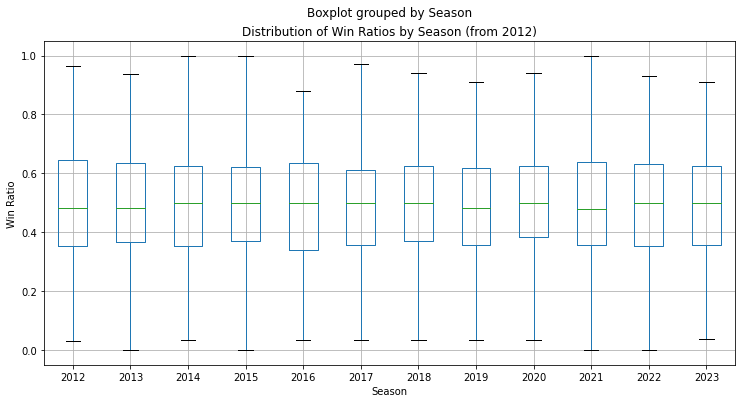

In [ ]:
df_features_season_2012 = df_features_season.loc[df_features_season['Season'] >= 2012]

df_features_season_2012.boxplot(column='WinRatio', by='Season', figsize=(12, 6))
plt.xlabel('Season')
plt.ylabel('Win Ratio')
plt.title('Distribution of Win Ratios by Season (from 2012)')
plt.show()

 # *MNCAA Tourney Compact Results*

In [ ]:
df_tourney_results = pd.read_csv('/content/march-machine-learning-mania-2023/MNCAATourneyCompactResults.csv').drop(['NumOT', 'WLoc'], axis=1)
df_tourney_results.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore
0,1985,136,1116,63,1234,54
1,1985,136,1120,59,1345,58
2,1985,136,1207,68,1250,43
3,1985,136,1229,58,1425,55
4,1985,136,1242,49,1325,38


### Distribution of Score Differences

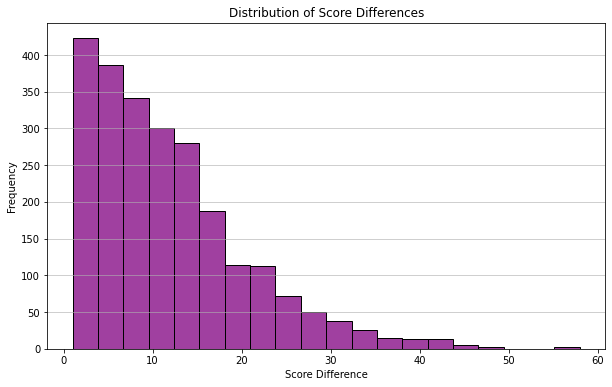

In [ ]:
df_tourney_results['ScoreDiff'] = df_tourney_results['WScore'] - df_tourney_results['LScore']
plt.figure(figsize=(10, 6))
sns.histplot(df_tourney_results['ScoreDiff'], kde=False, color='purple', bins=20)
plt.xlabel('Score Difference')
plt.ylabel('Frequency')
plt.title('Distribution of Score Differences')
plt.grid(axis='y', alpha=0.75)
plt.xticks(range(0, 70, 10))
plt.show()


### Counts of Wins by Season

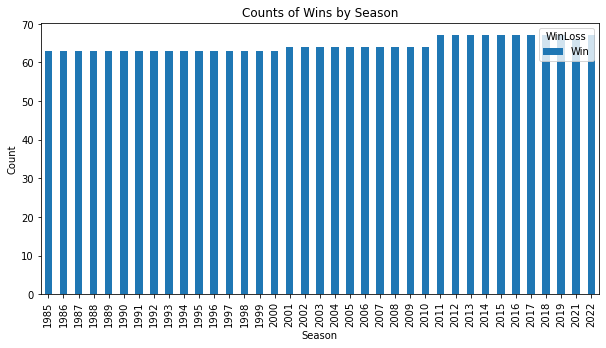

In [ ]:
df_tourney_results00 = df_tourney_results.copy()
df_tourney_results00['WinLoss'] = 'Win'
df_tourney_results00.loc[df_tourney_results00['LScore'] > df_tourney_results00['WScore'], 'WinLoss'] = 'Loss'
df_season_winloss = df_tourney_results00.groupby(['Season', 'WinLoss']).size().unstack().fillna(0)
df_season_winloss.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Counts of Wins by Season')
plt.show()


### Top 10 Teams by Number of Wins/Losses

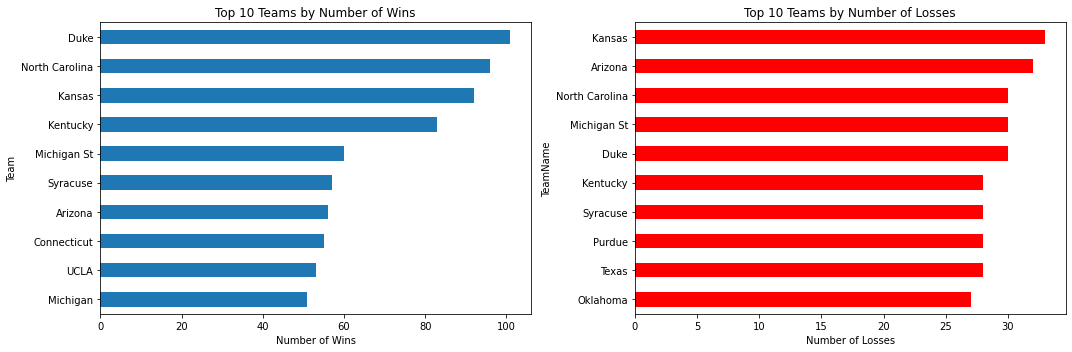

In [ ]:
df_winning_teams = df_tourney_results.merge(df_teams, left_on='WTeamID', right_on='TeamID')
df_losing_teams = df_tourney_results.merge(df_teams, left_on='LTeamID', right_on='TeamID')
win_count = df_winning_teams.groupby('TeamName').count()['WScore'].sort_values(ascending=False)
loss_count = df_losing_teams.groupby('TeamName').count()['LScore'].sort_values(ascending=False)
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
win_count[:10].sort_values().plot(kind='barh')
plt.xlabel('Number of Wins')
plt.ylabel('Team')
plt.title('Top 10 Teams by Number of Wins')
plt.subplot(1, 2, 2)
loss_count[:10].sort_values().plot(kind='barh', color='red')
plt.xlabel('Number of Losses')
plt.title('Top 10 Teams by Number of Losses')

plt.tight_layout()
plt.show()


In [ ]:
df = df_tourney_results.copy()

In [ ]:
df = (df.merge(df_seeds, how='left', left_on=['Season', 'WTeamID'], right_on=['Season', 'TeamID'])
      .drop('TeamID', axis=1)
      .rename(columns={'Seed': 'SeedW'})
      .merge(df_seeds, how='left', left_on=['Season', 'LTeamID'], right_on=['Season', 'TeamID'])
      .drop('TeamID', axis=1)
      .rename(columns={'Seed': 'SeedL'}))


In [ ]:
df.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,ScoreDiff,SeedW,SeedL
0,1985,136,1116,63,1234,54,9,X09,X08
1,1985,136,1120,59,1345,58,1,Z11,Z06
2,1985,136,1207,68,1250,43,25,W01,W16
3,1985,136,1229,58,1425,55,3,Y09,Y08
4,1985,136,1242,49,1325,38,11,Z03,Z14


In [ ]:
df[['SeedW', 'SeedL']] = df[['SeedW', 'SeedL']].replace('[^0-9]', '', regex=True).astype(int)
df.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,ScoreDiff,SeedW,SeedL
0,1985,136,1116,63,1234,54,9,9,8
1,1985,136,1120,59,1345,58,1,11,6
2,1985,136,1207,68,1250,43,25,1,16
3,1985,136,1229,58,1425,55,3,9,8
4,1985,136,1242,49,1325,38,11,3,14


### ✏ </br>
*In this part I merge two pandas dataframes df and df_features_season based on the columns Season and TeamID. The resulting merged dataframe has additional columns from df_features_season that are appended to the right of the columns in df. The merged rows are selected using a left join, which means that only the rows in df that have matching Season and TeamID values in df_features_season are kept in the resulting dataframe. The column names in df that have the same name as the columns in df_features_season have a 'W' suffix added to them to differentiate between the two.*

In [ ]:
df = df.merge(df_features_season.set_index(['Season', 'TeamID']), left_on=['Season', 'WTeamID'], right_index=True,
    how='left',
    suffixes=['', 'W']).rename(columns=lambda col: col + 'W' if col in ['NumWins', 'NumLosses', 'GapWins', 'GapLosses', 'WinRatio', 'GapAvg'] else col)


In [ ]:
df.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,ScoreDiff,SeedW,SeedL,WinRatioW,GapAvgW
0,1985,136,1116,63,1234,54,9,9,8,0.636364,3.636364
1,1985,136,1120,59,1345,58,1,11,6,0.620690,3.689655
2,1985,136,1207,68,1250,43,25,1,16,0.925926,15.666667
3,1985,136,1229,58,1425,55,3,9,8,0.740741,5.962963
4,1985,136,1242,49,1325,38,11,3,14,0.766667,5.633333


In [ ]:
df = df.merge(df_features_season.set_index(['Season', 'TeamID']), left_on=['Season', 'LTeamID'], right_index=True,
    how='left',
    suffixes=['', 'L']).rename(columns=lambda col: col + 'L' if col in ['NumWins', 'NumLosses', 'GapWins', 'GapLosses', 'WinRatio', 'GapAvg'] else col)


In [ ]:
df.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,ScoreDiff,SeedW,SeedL,WinRatioW,GapAvgW,WinRatioL,GapAvgL
0,1985,136,1116,63,1234,54,9,9,8,0.636364,3.636364,0.666667,10.466667
1,1985,136,1120,59,1345,58,1,11,6,0.620690,3.689655,0.680000,3.800000
2,1985,136,1207,68,1250,43,25,1,16,0.925926,15.666667,0.379310,-4.448276
3,1985,136,1229,58,1425,55,3,9,8,0.740741,5.962963,0.678571,3.785714
4,1985,136,1242,49,1325,38,11,3,14,0.766667,5.633333,0.740741,4.555556


In [ ]:
win_rename = {"WTeamID": "TeamIdA", "WScore" : "ScoreA", "LTeamID" : "TeamIdB","LScore": "ScoreB",}
win_rename.update({c : c[:-1] + "A" for c in df.columns if c.endswith('W')})
win_rename.update({c : c[:-1] + "B" for c in df.columns if c.endswith('L')})

lose_rename = {"WTeamID": "TeamIdB", "WScore" : "ScoreB", "LTeamID" : "TeamIdA","LScore": "ScoreA",}
lose_rename.update({c : c[:-1] + "B" for c in df.columns if c.endswith('W')})
lose_rename.update({c : c[:-1] + "A" for c in df.columns if c.endswith('L')})

win_df = df.copy().rename(columns=win_rename)
lose_df = df.copy().rename(columns=lose_rename)

df = pd.concat([win_df, lose_df], axis=0, sort=False)
df.head()

,Season,DayNum,TeamIdA,ScoreA,TeamIdB,ScoreB,ScoreDiff,SeedA,SeedB,WinRatioA,GapAvgA,WinRatioB,GapAvgB
0,1985,136,1116,63,1234,54,9,9,8,0.636364,3.636364,0.666667,10.466667
1,1985,136,1120,59,1345,58,1,11,6,0.620690,3.689655,0.680000,3.800000
2,1985,136,1207,68,1250,43,25,1,16,0.925926,15.666667,0.379310,-4.448276
3,1985,136,1229,58,1425,55,3,9,8,0.740741,5.962963,0.678571,3.785714
4,1985,136,1242,49,1325,38,11,3,14,0.766667,5.633333,0.740741,4.555556


In [ ]:
diffcols= ['Seed', 'WinRatio', 'GapAvg']
for i in diffcols:
    df[i + 'Diff'] = df[i + 'A'] - df[i + 'B']

In [ ]:
df.head()

,Season,DayNum,TeamIdA,ScoreA,TeamIdB,ScoreB,ScoreDiff,SeedA,SeedB,WinRatioA,GapAvgA,WinRatioB,GapAvgB,SeedDiff,WinRatioDiff,GapAvgDiff
0,1985,136,1116,63,1234,54,9,9,8,0.636364,3.636364,0.666667,10.466667,1,-0.030303,-6.830303
1,1985,136,1120,59,1345,58,1,11,6,0.620690,3.689655,0.680000,3.800000,5,-0.059310,-0.110345
2,1985,136,1207,68,1250,43,25,1,16,0.925926,15.666667,0.379310,-4.448276,-15,0.546616,20.114943
3,1985,136,1229,58,1425,55,3,9,8,0.740741,5.962963,0.678571,3.785714,1,0.062169,2.177249
4,1985,136,1242,49,1325,38,11,3,14,0.766667,5.633333,0.740741,4.555556,-11,0.025926,1.077778


In [ ]:
df['ScoreDiff'] = df['ScoreA'] - df['ScoreB']
df['WinA'] = (df['ScoreDiff'] > 0).astype(int)

### Win Ratio Difference by Seed Difference

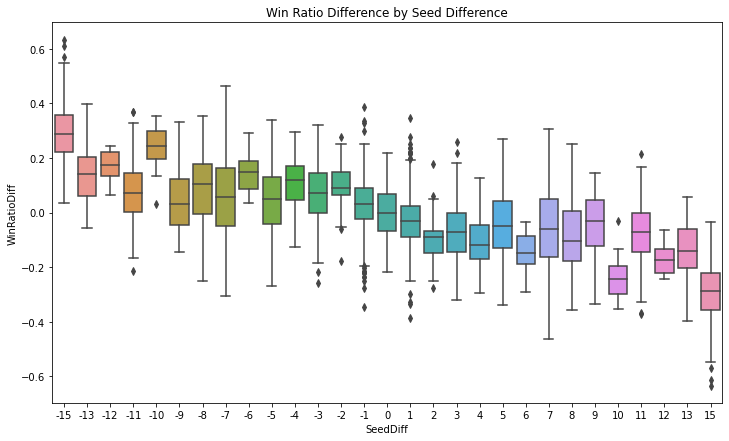

In [ ]:
plt.figure(figsize=(12, 7))
sns.boxplot(x="SeedDiff", y="WinRatioDiff", data=df)
plt.title('Win Ratio Difference by Seed Difference')
plt.show()


## ⚡ Histograms
###SeedDiff, WinRatioDiff, GapAvgDiff, ScoreDiff

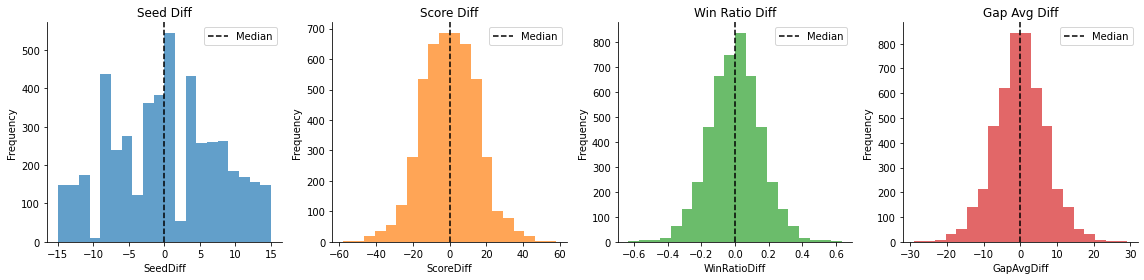

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(16, 4))
cols_to_plot = [('SeedDiff', 'Seed Diff'),('ScoreDiff', 'Score Diff'), ('WinRatioDiff', 'Win Ratio Diff'), ('GapAvgDiff', 'Gap Avg Diff')]

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']

for i, (col, title) in enumerate(cols_to_plot):
    ax[i].hist(df[col], bins=20, alpha=0.7, color=colors[i])
    ax[i].axvline(df[col].median(), color='black', linestyle='--', label='Median')
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].set_title(title, fontsize=12)
    ax[i].set_xlabel(col, fontsize=10)
    ax[i].set_ylabel('Frequency', fontsize=10)
    ax[i].legend(fontsize=10)

plt.tight_layout()
plt.show()

##  Distribution of Features

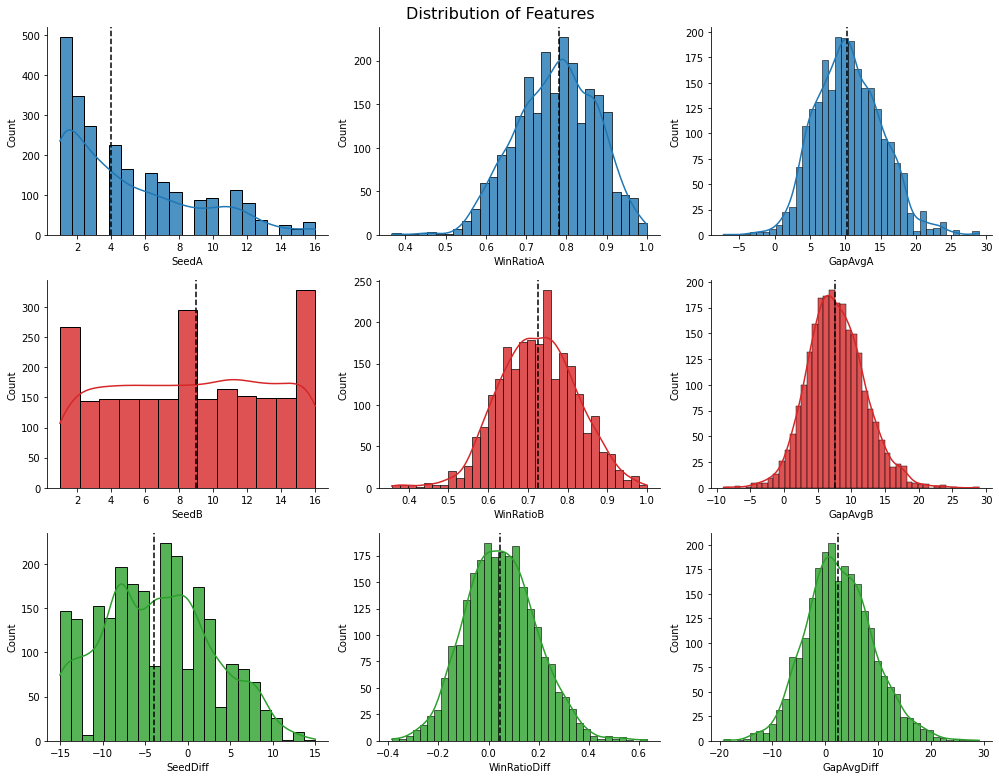

In [ ]:
X = df[["SeedA", "WinRatioA", 'GapAvgA', 'SeedB', 'WinRatioB', 'GapAvgB', 'SeedDiff', 'WinRatioDiff', 'GapAvgDiff']]
y = df[['WinA']]
# Remove duplicate index values
X = X[~X.index.duplicated()]
fig, axs = plt.subplots(3,3, figsize=(14, 11))
for i, col in enumerate(X.columns):
    if i in {0,1,2}:
        color = 'tab:blue'
    elif i in {3,4,5}:
        color = 'tab:red'
    else:
      color = 'tab:green'
    sns.histplot(data=X, x=col, ax=axs[i//3, i%3], color=color, kde=True, alpha=0.8)

    median = X[col].median()
    axs[i//3, i%3].axvline(median, color='black', linestyle='--', label='Median')

    axs[i//3, i%3].spines['top'].set_visible(False)
    axs[i//3, i%3].spines['right'].set_visible(False)

fig.suptitle('Distribution of Features', fontsize=16)

fig.tight_layout()

plt.show()


# *Prepare the test data*

In this part, I first split the 'ID' column into three columns for 'Season', 'TeamIdA', and 'TeamIdB' using the underscore character as a separator. Then I merge the resulting data frame with a 'seeds' data frame on 'Season' and 'TeamIdA' to get the seed value for TeamA, and do the same thing for TeamB. If a seed value is missing, it will be filled with 'W01' as the default seed. It then extracts the numerical value from the seed column by removing any non-numeric characters.

Then I merged the resulting data frame with a 'features_season' data frame twice, once for TeamA and once for TeamB, and renamed the columns in the second merge by adding a 'B' suffix to avoid column name conflicts. Finally, it drops the 'TeamID' column in both merge operations and returns the resulting data frame.

In [ ]:
df_test = pd.read_csv('/content/march-machine-learning-mania-2023/SampleSubmission2023.csv')
df_test.head()

,ID,Pred
0,2023_1101_1102,0.5
1,2023_1101_1103,0.5
2,2023_1101_1104,0.5
3,2023_1101_1105,0.5
4,2023_1101_1106,0.5


In [ ]:
df_test[['Season', 'TeamIdA', 'TeamIdB']] = df_test['ID'].str.split('_', expand=True).astype(int).iloc[:, [0, 1, 2]]


In [ ]:
df_test.head()

,ID,Pred,Season,TeamIdA,TeamIdB
0,2023_1101_1102,0.5,2023,1101,1102
1,2023_1101_1103,0.5,2023,1101,1103
2,2023_1101_1104,0.5,2023,1101,1104
3,2023_1101_1105,0.5,2023,1101,1105
4,2023_1101_1106,0.5,2023,1101,1106


In [ ]:
df_test = (df_test.merge(df_seeds, how='left', left_on=['Season', 'TeamIdA'], right_on=['Season', 'TeamID'])
           .drop('TeamID', axis=1)
           .rename(columns={'Seed': 'SeedA'})
           .fillna('W01'))

df_test = (df_test.merge(df_seeds, how='left', left_on=['Season', 'TeamIdB'], right_on=['Season', 'TeamID'])
           .drop('TeamID', axis=1)
           .rename(columns={'Seed': 'SeedB'})
           .fillna('W01'))

df_test.head()

,ID,Pred,Season,TeamIdA,TeamIdB,SeedA,SeedB
0,2023_1101_1102,0.5,2023,1101,1102,W01,W01
1,2023_1101_1103,0.5,2023,1101,1103,W01,W01
2,2023_1101_1104,0.5,2023,1101,1104,W01,X01
3,2023_1101_1105,0.5,2023,1101,1105,W01,W01
4,2023_1101_1106,0.5,2023,1101,1106,W01,W01


In [ ]:
import re
df_test['SeedA'] = df_test['SeedA'].map(lambda x: int(re.sub("[^0-9]", "", x)))
df_test['SeedB'] = df_test['SeedB'].map(lambda x: int(re.sub("[^0-9]", "", x)))

In [ ]:
df_test = pd.merge(df_test,
    df_features_season.rename(columns=lambda x: x + 'A' if x not in ['Season', 'TeamID'] else x),
    how='left',
    left_on=['Season', 'TeamIdA'],
    right_on=['Season', 'TeamID']
).drop(columns='TeamID', axis=1)


In [ ]:
df_test = pd.merge(df_test,
    df_features_season.rename(columns=lambda x: x + 'B' if x not in ['Season', 'TeamID'] else x),
    how='left',
    left_on=['Season', 'TeamIdB'],
    right_on=['Season', 'TeamID']
).drop(columns='TeamID', axis=1)


In [ ]:
df_test.head()

,ID,Pred,Season,TeamIdA,TeamIdB,SeedA,SeedB,WinRatioA,GapAvgA,WinRatioB,GapAvgB
0,2023_1101_1102,0.5,2023,1101,1102,1,1,0.346154,-3.692308,0.437500,-0.125000
1,2023_1101_1103,0.5,2023,1101,1103,1,1,0.346154,-3.692308,0.645161,5.838710
2,2023_1101_1104,0.5,2023,1101,1104,1,1,0.346154,-3.692308,0.852941,13.676471
3,2023_1101_1105,0.5,2023,1101,1105,1,1,0.346154,-3.692308,0.400000,-3.066667
4,2023_1101_1106,0.5,2023,1101,1106,1,1,0.346154,-3.692308,0.233333,-10.033333


In [ ]:
for col in diffcols:
    df_test[col + 'Diff'] = df_test[col + 'A'] - df_test[col + 'B']

In [ ]:
df_test.head()

,ID,Pred,Season,TeamIdA,TeamIdB,SeedA,SeedB,WinRatioA,GapAvgA,WinRatioB,GapAvgB,SeedDiff,WinRatioDiff,GapAvgDiff
0,2023_1101_1102,0.5,2023,1101,1102,1,1,0.346154,-3.692308,0.437500,-0.125000,0,-0.091346,-3.567308
1,2023_1101_1103,0.5,2023,1101,1103,1,1,0.346154,-3.692308,0.645161,5.838710,0,-0.299007,-9.531017
2,2023_1101_1104,0.5,2023,1101,1104,1,1,0.346154,-3.692308,0.852941,13.676471,0,-0.506787,-17.368778
3,2023_1101_1105,0.5,2023,1101,1105,1,1,0.346154,-3.692308,0.400000,-3.066667,0,-0.053846,-0.625641
4,2023_1101_1106,0.5,2023,1101,1106,1,1,0.346154,-3.692308,0.233333,-10.033333,0,0.112821,6.341026


## Preprocessing

In this part, I dropped some columns from the dataframe, standardized the remaining columns using the StandardScaler() function, and then converted the resulting data into PyTorch tensors. I also splitted the data into training and testing sets using the train_test_split() function from scikit-learn. The ultimate goal is to train a deep learning.

In [ ]:
import torch.nn as nn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

xx = df.drop(columns=['Season', 'DayNum', 'TeamIdA', 'ScoreA', 'TeamIdB', 'ScoreB', 'WinA', 'ScoreDiff'])
scaler = StandardScaler()

X_scaled = scaler.fit_transform(xx)
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(df['WinA'].values, dtype=torch.float32)
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)




# Neural Network
The network consists of four fully connected layers with 256, 128, 64, and 1 neurons, respectively. The activation functions used are PReLU and LeakyReLU, and the output is passed through a sigmoid function. The model also uses three batch normalization layers and two dropout layers for regularization.

The loss function used is the Brier score loss, which is a common loss function for binary classification problems. This loss function measures the difference between the true labels and predicted probabilities.

The neural network model is initialized with random weights, and during the training process, the weights are adjusted using backpropagation to minimize the loss function. The goal is to optimize the model to accurately predict the binary labels of a given dataset.


In [ ]:
input_shape = (X_train.shape[1],)

class CustomModel(nn.Module):
    def __init__(self):
        super(CustomModel, self).__init__()
        self.fc1 = nn.Linear(input_shape[0], 256)
        self.bn1 = nn.LayerNorm(256)
        self.dropout1 = nn.Dropout(0.5)
        self.prelu1 = nn.PReLU()
        self.fc2 = nn.Linear(256, 128)
        self.bn2 = nn.LayerNorm(128)
        self.dropout2 = nn.Dropout(0.5)
        self.lrelu1 = nn.LeakyReLU()
        self.fc3 = nn.Linear(128, 64)
        self.bn3 = nn.LayerNorm(64)
        self.gdropout1 = nn.Dropout(0.3)
        self.lrelu2 = nn.LeakyReLU()
        self.fc4 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.dropout1(x)
        x = self.prelu1(x)
        x = self.fc2(x)
        x = self.bn2(x)
        x = self.dropout2(x)
        x = self.lrelu1(x)
        x = self.fc3(x)
        x = self.bn3(x)
        x = self.gdropout1(x)
        x = self.lrelu2(x)
        x = self.fc4(x)
        x = self.sigmoid(x)
        return x

model = CustomModel()

def brier_score_loss(y_true, y_pred):
    return torch.mean(torch.pow(y_true - y_pred, 2))

# Training Loop
The loop below implements our neural network for training and testing a binary classification model. The model is trained using the RMSprop optimizer and the Brier score loss function. The learning rate is set to 0.01 and the number of epochs is set to 100.

The accuracy of the model is evaluated using the accuracy function, which returns the percentage of correct predictions. During each epoch, the train and test loss and accuracy are calculated and saved in lists. The model is trained for each epoch on the training set and evaluated on the test set.

At the end of each epoch, the train and test loss and accuracy are printed. The output shows the progress of the training and testing of the model.

In [ ]:
optimizer = torch.optim.RMSprop(model.parameters())
criterion = brier_score_loss


learning_rate = 0.01
num_epochs = 100


optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)


def accuracy(y_pred, y_true):
    return torch.mean((torch.round(y_pred) == y_true).float())

train_loss_list = []
test_loss_list = []
train_acc_list = []
test_acc_list = []

for epoch in range(num_epochs):
    train_loss = 0.0
    train_acc = 0.0
    model.train()
    for i in range(len(X_train)):
        y_pred = model(X_train[i].unsqueeze(0))
        loss = criterion(y_train[i], y_pred)
        acc = accuracy(y_pred, y_train[i])

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        train_acc += acc.item()

    train_loss /= len(X_train)
    train_acc /= len(X_train)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc)

    test_loss = 0.0
    test_acc = 0.0
    model.eval()
    with torch.no_grad():
        for i in range(len(X_test)):
            y_pred = model(X_test[i])
            loss = criterion(y_test[i], y_pred)
            acc = accuracy(y_pred, y_test[i])

            test_loss += loss.item()
            test_acc += acc.item()

    test_loss /= len(X_test)
    test_acc /= len(X_test)
    test_loss_list.append(test_loss)
    test_acc_list.append(test_acc)

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}")


Epoch 1/100, Train Loss: 0.2242, Train Acc: 0.6673, Test Loss: 0.2064, Test Acc: 0.7034
Epoch 2/100, Train Loss: 0.2112, Train Acc: 0.6765, Test Loss: 0.2022, Test Acc: 0.6855
Epoch 3/100, Train Loss: 0.2054, Train Acc: 0.6817, Test Loss: 0.1904, Test Acc: 0.7023
Epoch 4/100, Train Loss: 0.2068, Train Acc: 0.6869, Test Loss: 0.1948, Test Acc: 0.6939
Epoch 5/100, Train Loss: 0.2079, Train Acc: 0.6814, Test Loss: 0.1963, Test Acc: 0.7002
Epoch 6/100, Train Loss: 0.2034, Train Acc: 0.6822, Test Loss: 0.1920, Test Acc: 0.6939
Epoch 7/100, Train Loss: 0.2055, Train Acc: 0.6751, Test Loss: 0.1859, Test Acc: 0.7055
Epoch 8/100, Train Loss: 0.2043, Train Acc: 0.6809, Test Loss: 0.1842, Test Acc: 0.7044
Epoch 9/100, Train Loss: 0.2046, Train Acc: 0.6833, Test Loss: 0.1858, Test Acc: 0.7117
Epoch 10/100, Train Loss: 0.2044, Train Acc: 0.6943, Test Loss: 0.1899, Test Acc: 0.7117
Epoch 11/100, Train Loss: 0.2040, Train Acc: 0.6775, Test Loss: 0.1814, Test Acc: 0.7201
Epoch 12/100, Train Loss: 0.20

In [ ]:
model.eval()
with torch.no_grad():
  y_pred = model(X_test)
  test_loss = criterion(y_test, y_pred).item()
  print(f"Test Loss: {test_loss:.4f}")

Test Loss: 0.3310


### Train Loss and Test Loss

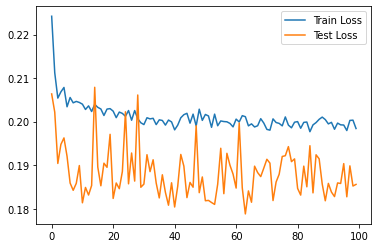

In [ ]:
plt.plot(train_loss_list, label='Train Loss')
plt.plot(test_loss_list, label='Test Loss')
plt.legend()
plt.show()

In [ ]:
drive.mount('/content/gdrive')
os.chdir('/content/gdrive/MyDrive/Colab Notebooks')
torch.save(model.state_dict(), 'my_model.pt')

Mounted at /content/gdrive


I changed some parameter.
According to the results of the initial neural network, the loss value for the test data is between 19 and 20 and for the train data between 18 and 19, which is a relatively good value, but after that we upgrade the neural network to 512 and We use BatchNorm instead of NormLayer and it can be seen that the value of Loss for valid data has slightly improved.

Epoch 1/100, Train Loss: 0.2315, Train Acc: 0.6704, Test Loss: 0.2444, Test Acc: 0.6415
Epoch 2/100, Train Loss: 0.2137, Train Acc: 0.6681, Test Loss: 0.2050, Test Acc: 0.7096
Epoch 3/100, Train Loss: 0.2132, Train Acc: 0.6746, Test Loss: 0.1905, Test Acc: 0.6981
Epoch 4/100, Train Loss: 0.2112, Train Acc: 0.6822, Test Loss: 0.2251, Test Acc: 0.6572
Epoch 5/100, Train Loss: 0.2086, Train Acc: 0.6775, Test Loss: 0.1874, Test Acc: 0.7107
Epoch 6/100, Train Loss: 0.2109, Train Acc: 0.6778, Test Loss: 0.2065, Test Acc: 0.6813
Epoch 7/100, Train Loss: 0.2089, Train Acc: 0.6741, Test Loss: 0.2038, Test Acc: 0.6971
Epoch 8/100, Train Loss: 0.2102, Train Acc: 0.6683, Test Loss: 0.1972, Test Acc: 0.7044
Epoch 9/100, Train Loss: 0.2093, Train Acc: 0.6791, Test Loss: 0.2035, Test Acc: 0.6813
Epoch 10/100, Train Loss: 0.2103, Train Acc: 0.6786, Test Loss: 0.2021, Test Acc: 0.7044
Epoch 11/100, Train Loss: 0.2060, Train Acc: 0.6765, Test Loss: 0.1954, Test Acc: 0.7128
Epoch 12/100, Train Loss: 0.20

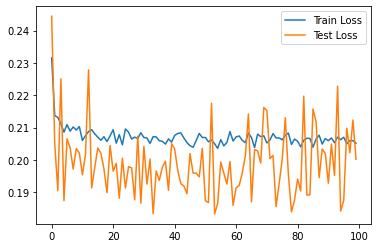

In [ ]:
class CustomModel(nn.Module):
    def __init__(self):
        super(CustomModel, self).__init__()
        self.fc1 = nn.Linear(input_shape[0], 512)
        self.bn1 = nn.LayerNorm(512)
        self.dropout1 = nn.Dropout(0.5)
        self.prelu1 = nn.PReLU()
        self.fc2 = nn.Linear(512, 32)
        self.bn2 = nn.LayerNorm(32)
        self.lrelu1 = nn.LeakyReLU()
        self.fc3 = nn.Linear(32, 96)
        self.bn3 = nn.LayerNorm(96)
        self.gdropout1 = nn.Dropout(0.5)
        self.lrelu2 = nn.LeakyReLU()
        self.fc4 = nn.Linear(96, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.dropout1(x)
        x = self.prelu1(x)
        x = self.fc2(x)
        x = self.bn2(x)
        x = self.lrelu1(x)
        x = self.fc3(x)
        x = self.bn3(x)
        x = self.gdropout1(x)
        x = self.lrelu2(x)
        x = self.fc4(x)
        x = self.sigmoid(x)
        return x

model = CustomModel()


optimizer = torch.optim.RMSprop(model.parameters())
criterion = brier_score_loss


learning_rate = 0.01
num_epochs = 100


optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)


def accuracy(y_pred, y_true):
    return torch.mean((torch.round(y_pred) == y_true).float())

train_loss_list = []
test_loss_list = []
train_acc_list = []
test_acc_list = []

for epoch in range(num_epochs):
    train_loss = 0.0
    train_acc = 0.0
    model.train()
    for i in range(len(X_train)):
        y_pred = model(X_train[i].unsqueeze(0))
        loss = criterion(y_train[i], y_pred)
        acc = accuracy(y_pred, y_train[i])

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        train_acc += acc.item()

    train_loss /= len(X_train)
    train_acc /= len(X_train)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc)

    test_loss = 0.0
    test_acc = 0.0
    model.eval()
    with torch.no_grad():
        for i in range(len(X_test)):
            y_pred = model(X_test[i])
            loss = criterion(y_test[i], y_pred)
            acc = accuracy(y_pred, y_test[i])

            test_loss += loss.item()
            test_acc += acc.item()

    test_loss /= len(X_test)
    test_acc /= len(X_test)
    test_loss_list.append(test_loss)
    test_acc_list.append(test_acc)

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}")


plt.plot(train_loss_list, label='Train Loss')
plt.plot(test_loss_list, label='Test Loss')
plt.legend()
plt.show()




# Validation
This part implements a k-fold cross-validation for a PyTorch model.
It takes a DataFrame and optionally a test DataFrame, and splits the data into folds based on seasons. Then, it standardizes the features using a StandardScaler, converts the data into PyTorch tensors, defines a PyTorch model (either a regression or a classification model), initializes an optimizer and a loss function, trains the model on the training set, and evaluates the model on the validation set. It returns the predicted values for the test set for each fold.

In [ ]:
features = ["SeedA", "SeedB", 'WinRatioA', 'GapAvgA', 'WinRatioB', 'GapAvgB', 'SeedDiff', 'WinRatioDiff', 'GapAvgDiff']

In [ ]:
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler

def kfold_torch(df, df_test_=None, plot=False, verbose=0, mode="all"):
    seasons = df['Season'].unique()
    cvs = []
    pred_tests = []
    target = "ScoreDiff" if mode == "reg" else "WinA"
    for season in seasons[1:]:
        if verbose:
            print(f'\nValidating on season {season}')

        df_train = df[df['Season'] < season].reset_index(drop=True).copy()
        df_val = df[df['Season'] == season].reset_index(drop=True).copy()
        df_test = df_test_.copy()

        # Feature scaling
        scaler = StandardScaler()
        X_train = scaler.fit_transform(df_train[features])
        X_val = scaler.transform(df_val[features])
        if df_test is not None:
            X_test = scaler.transform(df_test[features])

        # Convert data to PyTorch tensors
        X_train = torch.from_numpy(X_train).float()
        y_train = torch.from_numpy(df_train[target].values).float().view(-1, 1)
        X_val = torch.from_numpy(X_val).float()
        y_val = torch.from_numpy(df_val[target].values).float().view(-1, 1)
        if df_test is not None:
            X_test = torch.from_numpy(X_test).float()

        if mode == "reg":
            model = nn.Sequential(
                nn.Linear(X_train.shape[1], 32),
                nn.ReLU(),
                nn.Linear(32, 1)
            )
        else:
            model = nn.Sequential(
                nn.Linear(X_train.shape[1], 512),
                nn.BatchNorm1d(512),
                nn.Dropout(0.5),
                nn.PReLU(),
                nn.Linear(512, 32),
                nn.BatchNorm1d(32),
                nn.LeakyReLU(),
                nn.Linear(32, 96),
                nn.BatchNorm1d(96),
                nn.Dropout(0.5),
                nn.LeakyReLU(),
                nn.Linear(96, 1),
                nn.Sigmoid()
            )

        # optimizer and loss function
        optimizer = optim.RMSprop(model.parameters(), lr=0.001)
        criterion = nn.BCELoss() if mode == "clf" else nn.MSELoss()

        # Train model
        model.train()
        for epoch in range(100):
            optimizer.zero_grad()
            y_pred = model(X_train)
            loss = criterion(y_pred, y_train)
            loss.backward()
            optimizer.step()

        # val set
        model.eval()
        with torch.no_grad():
            y_val_pred = model(X_val)
            if mode == "reg":
                pred = y_val_pred.numpy()
            else:
                pred = y_val_pred.numpy().flatten()
            val_loss = criterion(y_val, y_val_pred).item()
            print(f"Valid Loss: {val_loss:.4f}")

        if df_test is not None:
            with torch.no_grad():
                y_test_pred = model(X_test)
                if mode == "reg":
                    pred_test = y_test_pred.numpy().flatten()
                else:
                    pred_test = y_test_pred.numpy().flatten()
                pred_tests.append(pred_test)
    return pred_tests


In [ ]:
pred_tests = kfold_torch(df, df_test, plot=True, verbose=1, mode="model")


Validating on season 1986
Valid Loss: 0.1903

Validating on season 1987
Valid Loss: 0.2388

Validating on season 1988
Valid Loss: 0.2216

Validating on season 1989
Valid Loss: 0.2111

Validating on season 1990
Valid Loss: 0.2094

Validating on season 1991
Valid Loss: 0.1909

Validating on season 1992
Valid Loss: 0.2005

Validating on season 1993
Valid Loss: 0.1814

Validating on season 1994
Valid Loss: 0.1766

Validating on season 1995
Valid Loss: 0.1816

Validating on season 1996
Valid Loss: 0.1718

Validating on season 1997
Valid Loss: 0.1702

Validating on season 1998
Valid Loss: 0.1976

Validating on season 1999
Valid Loss: 0.1867

Validating on season 2000
Valid Loss: 0.1747

Validating on season 2001
Valid Loss: 0.1918

Validating on season 2002
Valid Loss: 0.1922

Validating on season 2003
Valid Loss: 0.1789

Validating on season 2004
Valid Loss: 0.1858

Validating on season 2005
Valid Loss: 0.1714

Validating on season 2006
Valid Loss: 0.1975

Validating on season 2007
Valid L

In [ ]:
pred_test = np.mean(pred_tests, 0)
df_test['pred'] = pred_test

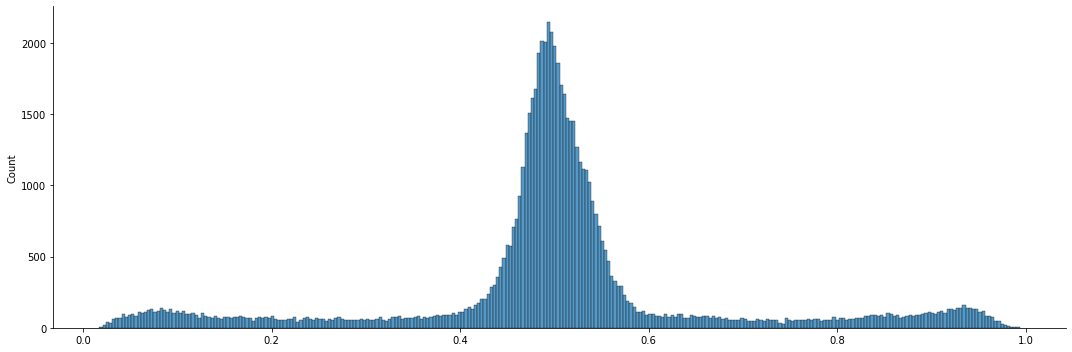

In [ ]:
_ = sns.displot(pred_test, height=5, aspect=3)

In [ ]:
final_sub = df_test[['ID', 'pred']].copy()
final_sub_w = df_test[['ID', 'pred']].copy()
final_sub.to_csv('submission_ncaa.csv', index=False)
from google.colab import files
# files.download('submission_ncaa.csv')


In [ ]:
#@title Simulator
import re
from pathlib import Path
import pandas as pd
import itertools
import graphviz


round_names = {
    0: 'Play-in Games',
    1: 'First Round',
    2: 'Round of 32',
    3: 'Sweet 16',
    4: 'Elite 8',
    5: 'Final 4',
    6: 'Championship'
}


class Data:

    def __init__(self, mw=None, dir='./input'):
        if mw is None:
            raise ValueError('Tournament type not set')
        path = Path(dir)
        self.mw = mw.upper()
        self.seeds = pd.read_csv(path/(f'{self.mw}NCAATourneySeeds.csv'))
        self.team_sids = self.seeds['Season'].astype(str) + '_' + self.seeds['TeamID'].astype(str)
        self.team_sids = self.team_sids.unique().tolist()
        self.seasons = pd.read_csv(path/(f'{self.mw}Seasons.csv'))
        self.teams = pd.read_csv(path/(f'{self.mw}Teams.csv'))
        self.slots = pd.read_csv(path/(f'{self.mw}NCAATourneySlots.csv'))
        self.seedyear_dict, self.seedyear_dict_rev = \
            self.build_seed_dicts()
        self.t_dict = (self.teams.set_index('TeamID')['TeamName']
                                 .to_dict())
        self.t_dict_rev = {v: k for k, v in self.t_dict.items()}

    def build_seed_dicts(self):
        seedyear_dict = {}
        seedyear_dict_rev = {}

        for s in self.seeds['Season'].unique():
            seed_data = self.seeds.query('Season == @s')
            s_dict = (seed_data.set_index('Seed')['TeamID']
                               .to_dict())
            s_dict_rev = {v: k for k, v in s_dict.items()}
            seedyear_dict.update({s: s_dict})
            seedyear_dict_rev.update({s: s_dict_rev})
        return seedyear_dict, seedyear_dict_rev

    def get_round(self, season, t1_id, t2_id):
        return get_round(season,
                         t1_id,
                         t2_id,
                         self.seedyear_dict_rev)


class Team:

    def __init__(self, t_id, name, seed):
        self.id = t_id
        self.name = name
        self.seed = seed

    def __repr__(self):
        return f'{self.seed} {self.name} - TeamID: {self.id}'


class Submission:


    def __init__(self, sub_df, data):
        self.t_dict = data.t_dict
        self.t_dict_rev = data.t_dict_rev
        sub_df[['Season', 'Team1ID', 'Team2ID']] = \
            sub_df['ID'].str.split('_', expand=True)
        sub_df[['Season', 'Team1ID', 'Team2ID']] = \
            sub_df[['Season', 'Team1ID', 'Team2ID']].astype(int)
        for t in [1, 2]:
            sub_df[f'Team{t}SID'] = \
                sub_df['Season'].astype(str) + '_' + sub_df[f'Team{t}ID'].astype(str)
        sub_df = sub_df.query('Team1SID in @data.team_sids '
                              'and Team2SID in @data.team_sids').copy()
        sub_df['Round'] = \
            sub_df.apply(
                lambda row:
                data.get_round(row['Season'],
                               row['Team1ID'],
                               row['Team2ID']),
                axis=1
            )
        sub_df.dropna(subset=['Round'], inplace=True)
        self.seasons = sub_df['Season'].unique().tolist()
        self._df = sub_df.copy()

        def prediction_init(row):
            s_dict = data.seedyear_dict[row['Season']]
            pred = Prediction(row['Season'],
                              row['Team1ID'],
                              row['Team2ID'],
                              row['Pred'],
                              self.t_dict,
                              s_dict)
            return pred

        self._df['PredData'] = self._df.apply(prediction_init, axis=1)

    def get_pred(self, game_id=None):
        '''
        Retrieve prediction using game_id or leave blank to get
        all predictions in a list
        '''
        if game_id is None:
            return self.predictions

        alt_game_id = get_alt_game_id(game_id)
        sub_ids = self.predictions.map(lambda x: x.game_id)

        idx = ((sub_ids == game_id) |
               (sub_ids == alt_game_id))

        if idx.sum() == 0:
            raise ValueError('Game not found!')

        pred = self.predictions.loc[idx].squeeze()
        return pred

    def get_pred_by_teams(self,
                          season=2021,
                          t1_id=None,
                          t2_id=None,
                          t1_name=None,
                          t2_name=None,):
        ids = False
        if t1_id is not None and t2_id is not None:
            ids = True
        elif t1_name is not None and t2_name is not None:
            if ids:
                raise ValueError(
                    'provide only names or ids of team'
                    )
            t1_id = self.t_dict_rev.get(t1_name)
            t2_id = self.t_dict_rev.get(t2_name)
        else:
            raise ValueError(
                'Please provide a name or ID for both team 1 and 2'
            )
        game_id = f'{season}_{t1_id}_{t2_id}'
        pred = self.lookup_df.loc[game_id, 'PredData']
        return pred

    @property
    def predictions(self):
        return self.df['PredData']

    @property
    def df(self):
        df = self._df.copy()
        df.set_index('ID', inplace=True)
        col_order = ['Season', 'Round', 'Team1ID',
                     'Team2ID', 'Pred', 'PredData']

        return df[col_order]

    @property
    def lookup_df(self):
        df = self.df.copy()
        df_swap = df.copy()
        df_swap.index = df_swap['PredData'].map(
            lambda x: x.alt_game_id
            )
        df_swap.index.name = 'ID'
        df_swap[['Team1ID', 'Team2ID']] = \
            df[['Team2ID', 'Team1ID']].values
        df_swap['Pred'] = 1 - df_swap['Pred']

        return pd.concat([df, df_swap])


class Prediction:

    def __init__(self, season, t1_id, t2_id, pred, t_dict, s_dict):

        self.t_dict = t_dict
        self.s_dict = s_dict
        self.game_id = f'{season}_{t1_id}_{t2_id}'
        self.season = season
        self.t1_id = t1_id
        self.t2_id = t2_id
        self.pred = pred

    def __repr__(self):
        if self.proba[self.t1_id] > .5:
            proba = self.proba[self.t1_id]
            win_name = self.t1_name
            lose_name = self.t2_name
        else:
            proba = self.proba[self.t2_id]
            win_name = self.t2_name
            lose_name = self.t1_name

        return (f'{proba:.1%} chance of '
                f'{win_name} beating {lose_name}')

    @property
    def t1_name(self):
        return self.t_dict[self.t1_id]

    @property
    def t2_name(self):
        return self.t_dict[self.t2_id]

    @property
    def alt_game_id(self):
        return get_alt_game_id(self.game_id)

    @property
    def proba(self):
        return {
            self.t1_id: self.pred,
            self.t2_id: 1 - self.pred
        }

    @property
    def logloss(self):
        return {
            self.t1_id: -np.log(self.pred),
            self.t2_id: -np.log(1 - self.pred)
        }

    @property
    def brierscore(self):
        return {
            self.t1_id: (1 - self.pred) ** 2,
            self.t2_id: (self.pred) ** 2
        }

    @property
    def round(self):
        return self.get_round

    def get_favored(self):
        if self.proba[self.t1_id] > 0.5:
            return self.t1_id
        else:
            return self.t2_id

    def get_random(self):
        if self.proba[self.t1_id] > np.random.rand():
            return self.t1_id
        else:
            return self.t2_id


class Tournament:

    def __init__(self, data, submission, season):

        # Add metadata to be called by class
        self.submission = submission  # submission class to get preds
        self.mw = data.mw
        self.season = season  # season year
        self.current_r = 0  # initiate at round 0 (play-in)
        self.results = {}  # results stored as slot: TeamID

        # Create seed: teamID dictionary
        self.t_dict = data.t_dict
        self.s_dict = data.seedyear_dict[self.season]
        self.s_dict_rev = data.seedyear_dict_rev[self.season]
        self._summary = {}

        # Only men's file has differing slots by year - select the year
        #       we need and remove season column
        self.slots = data.slots.copy()
        self.slots = self.slots[self.slots['Season'] == season].copy()
        self.slots.drop(columns='Season', inplace=True)

        # Initiate game classes and save as Tournament attribute
        self.initialize_games()

    def initialize_games(self):
        def game_init(row):
            game = Game(row, self.t_dict,
                        self.s_dict, self.season)
            return game

        if (len(self.s_dict) == 0) or (len(self.slots) == 0):
            raise RuntimeError('''
                    Please check to see that your submission file and
                    tournament data class has both have the appropriate season.
                    ''')
        self.games = self.slots.apply(game_init, axis=1)
        self.games.index = self.slots['Slot']

    @property
    def n_teams(self):
        return len(self.s_dict)

    @property
    def summary(self):
        if len(self._summary) == 0:
            self._summary = self.summarize_results()
        return self._summary

    def summarize_results(self, previous_summary=None):
        if previous_summary is not None:
            self._summary = previous_summary
        for slot, team in self.results.items():
            team = team.id
            r = slot[:2]
            if 'R' not in r:
                r = 'R0'
            if self._summary.get(r) is None:
                self._summary.update({r: {team: 1}})
            elif self._summary[r].get(team) is None:
                self._summary[r].update({team: 1})
            else:
                self._summary[r][team] += 1
        return self._summary

    def summary_to_df(self, summary=None, n_sim=1):

        if summary is None:
            summary = self.summary

        columns = [round_names.get(k) for k in range(7)]
        if self.mw == 'W' and self.season < 2022:
            columns = columns[1:]
        summary_df = pd.DataFrame(summary)
        summary_df.columns = columns
        summary_df.index.name = 'TeamID'
        all_teams = list(self.s_dict.values())
        missing_teams = list(set(all_teams) - set(summary_df.index))
        if len(missing_teams) > 0:
            missing_teams_df = pd.DataFrame(np.nan,
                                            index=missing_teams,
                                            columns=summary_df.columns)
            summary_df = pd.concat([summary_df, missing_teams_df])
        summary_df['Team'] = [f'{self.s_dict_rev[t]} - '
                              f'{self.submission.t_dict[t]}'
                              for t in summary_df.index]
        columns.insert(0, 'Team')
        summary_df = summary_df[columns]

        summary_df['First Round'].fillna(n_sim, inplace=True)
        summary_df.fillna(0, inplace=True)
        summary_df.sort_values(by=columns[::-1], ascending=False, inplace=True)
        return summary_df

    def simulate_games(self, style):


        def find_winner(x):
            if x.r == self.current_r:
                win_id = x.get_winner(self.submission, style)
                if x.strong_team.id == win_id:
                    self.results.update({x.slot: x.strong_team})
                elif x.weak_team.id == win_id:
                    self.results.update({x.slot: x.weak_team})
                else:
                    raise ValueError('Couldn\'t find winner')

            else:
                pass

        self.games.map(find_winner)  # apply function

    def advance_teams(self):

        self.games.map(lambda x: x.add_teams(self.results))

    def simulate_round(self, style):

        self.simulate_games(style)
        self.advance_teams()

    def simulate_tournament(self, style, seed=None):

        if seed is not None:
            np.random.seed(seed)  # seed np at tournament level

        # Run simulations for round 0->6
        while self.current_r < 7:
            self.simulate_round(style)
            self.current_r += 1  # increments round by 1

    def simulate_tournaments(self, n_sim=500, loss_func='brier'):

        summary = {}
        expected_losses = []

        for i in range(int(n_sim)):
            self.reset_tournament()
            self.simulate_tournament('random', seed=i)
            summary = self.summarize_results(previous_summary=summary)
            losses = self.get_losses(func=loss_func)
            loss = losses.mean()
            expected_losses.append(loss)

        self._summary = summary
        self.expected_losses = np.array(expected_losses)
        return self.summary_to_df(self._summary, n_sim=n_sim), \
            self.expected_losses

    def get_losses(self, func='brier'):

        def logloss(x):
            w_id = self.results.get(x.slot).id
            if w_id is None:
                return np.nan()
            game_id = x.game_id
            pred = self.submission.get_pred(game_id)
            logloss = pred.logloss[w_id]
            return logloss

        def brierscore(x):
            w_id = self.results.get(x.slot).id
            if w_id is None:
                return np.nan()
            game_id = x.game_id
            pred = self.submission.get_pred(game_id)
            brierscore = pred.brierscore[w_id]
            return brierscore
        if func == 'brier':
            losses = self.games.map(lambda x: brierscore(x))
        elif func == 'log':
            losses = self.games.map(lambda x: logloss(x))
        else:
            raise ValueError(f'{func} is not a recognized loss function')
        losses = losses.loc[
            losses.index.str.startswith('R')
            ]

        return losses

    def get_odds(self):

        def calc_odds(x):
            w_id = self.results.get(x.slot).id
            if w_id is None:
                return np.nan()
            game_id = x.game_id
            pred = self.submission.get_pred(game_id)
            proba = pred.proba[w_id]
            return proba

        odds = self.games.map(lambda x: calc_odds(x))
        odds = odds.loc[
            odds.index.str.startswith('R')
            ]
        return odds

    def graph_games(self, rounds=list(range(7))):
        games = [g for g in self.games if g.r in rounds]

        graph = graphviz.Digraph(node_attr={'shape': 'rounded',
                                            'color': 'lightblue2'
                                            })
        for g in games:

            T1 = 'R' + f'{g.r} {g.strong_team.seed}-{g.strong_team.name}'
            T2 = 'R' + f'{g.r} {g.weak_team.seed}-{g.weak_team.name}'
            W = 'R' + f'{g.r+1} {self.results[g.slot].seed}' \
                f'-{self.results[g.slot].name}'

            pred = self.submission.get_pred(f'{self.season}_'
                                            f'{g.strong_team.id}_'
                                            f'{g.weak_team.id}')
            if g.strong_team.name == self.results[g.slot].name:
                odds = pred.proba[g.strong_team.id]
                T1_params = {'color': 'green', 'label': f'{odds:.0%}'}
                T2_params = {'color': 'red'}

            else:
                odds = pred.proba[g.weak_team.id]
                T2_params = {'color': 'green', 'label': f'{odds:.0%}'}
                T1_params = {'color': 'red'}

            graph.edge(T1, W, **T1_params)
            graph.edge(T2, W, **T2_params)

        graph.graph_attr['rankdir'] = 'LR'
        graph.graph_attr['size'] = '30'

        graph.node_attr.update(style='rounded')

        return graph

    def get_current_round(self):
        self.current_r = \
            self.games.map(lambda x: x.r - 1 if x.team_is_missing()
                                             else np.nan).min()

    def update_results(self, new_results):

        self.reset_tournament()
        new_results_team = \
            {slot: Team(t_id=tid,
                        name=self.t_dict.get(tid),
                        seed=self.s_dict_rev.get(tid)
                        )
             for slot, tid in new_results.items()}
        self.results.update(new_results_team)

        self.advance_teams()
        self.get_current_round()
        self._summary = {}

    def get_historic_results(self):
        self.update_results(historic_results[self.mw][self.season])

    def reset_tournament(self):
        self.current_r = 0  # initiate at round 0 (play-in)
        self.results = {}  # results stored as slot: TeamID
        self._summary = {}
        self.initialize_games()


class Game:


    def __init__(self, row_slots, t_dict, s_dict, season):
        # Add relavent metadata for game - source is slots csv
        self.season = season
        self.slot = row_slots['Slot']
        self.strong_seed = row_slots['StrongSeed']
        self.weak_seed = row_slots['WeakSeed']

        # extract round label from game
        r = re.compile(r'(R.)[WXYZC].')
        match = r.search(self.slot)
        if match is not None:
            self.r_label = match.group(1)
        else:
            self.r_label = 'R0'  # label play-in games

        # set round equiv to tournament.current_r (int)
        self.r = int(self.r_label[-1])

        # Set teams if slot is determined only by seed
        #       This places only the initial games.
        self.strong_team = None
        self.weak_team = None
        strong_id = s_dict.get(self.strong_seed)
        weak_id = s_dict.get(self.weak_seed)

        # Initiate team class that holds team attrib.
        if strong_id is not None:
            self.strong_team = Team(strong_id,
                                    t_dict.get(strong_id),
                                    self.strong_seed)

        if weak_id is not None:
            self.weak_team = Team(weak_id,
                                  t_dict.get(weak_id),
                                  self.weak_seed)

    def __repr__(self):
        if self.team_is_missing():
            return f'{self.season} - {self.slot}: Game not yet set'
        else:
            return (f'{self.season} - {self.slot}: {self.strong_team.name} '
                    f'vs. {self.weak_team.name}')

    @property
    def game_id(self):
        return '_'.join([str(self.season),
                         str(self.strong_team.id),
                         str(self.weak_team.id)])

    def add_teams(self, results):
        '''
        Checks all results and updates games if results exist.
        '''

        if results.get(self.strong_seed) is not None:
            self.strong_team = results.get(self.strong_seed)
        if results.get(self.weak_seed) is not None:
            self.weak_team = results.get(self.weak_seed)

    def team_is_missing(self):
        '''
        Checks if either team is missing
        '''
        if self.strong_team is None or self.weak_team is None:
            return True
        else:
            return False

    def get_winner(self, submission, style, seed=0):
        '''
        Retrieves the winner of the game from the submission
        file based on the chosen methodology.
        '''

        if self.team_is_missing():
            raise ValueError('At least one team does not exist')

        if style == 'chalk':
            win_id = (
                submission.get_pred(self.game_id)
                          .get_favored()
                          )
            return win_id
        elif style == 'random':
            win_id = (
                submission.get_pred(self.game_id)
                          .get_random()
                          )
            return win_id
        else:
            raise ValueError('Please choose style="random" or style="chalk"')


def get_alt_game_id(game_id):
    alt_game_id = game_id.split('_')
    alt_game_id = '_'.join([alt_game_id[0],
                            alt_game_id[2],
                            alt_game_id[1]
                            ])
    return alt_game_id


def get_round(season, t1_id, t2_id, seedyear_dict_rev):
    round_dict = gen_round_dict()

    s_dict_rev = seedyear_dict_rev[season]
    t1_seed = s_dict_rev[t1_id]
    t2_seed = s_dict_rev[t2_id]

    t1_seednum = int(t1_seed[1:3])
    t2_seednum = int(t2_seed[1:3])

    t1_reg = t1_seed[0]
    t2_reg = t2_seed[0]

    area_dict = {'W':'WX', 'X':'WX', 'Y':'YZ', 'Z':'YZ'}

    t1_area = area_dict.get(t1_reg)
    t2_area = area_dict.get(t2_reg)

    if t1_area != t2_area:
        return 6
    elif t1_reg != t2_reg:
        return 5
    else:
        matchup = f'{t2_seednum}v{t1_seednum}'
        return round_dict.get(matchup)
    raise

def gen_round_dict():
    round_dict = {}

    r4 = [[1,16,8,9,5,12,4,13,6,11,3,14,7,10,15,2]]
    for seeds in r4:
        for pair in itertools.combinations(seeds,2):
            round_dict[str(pair[0])+'v'+str(pair[1])] = 4
            round_dict[str(pair[1])+'v'+str(pair[0])] = 4


    r3 = [[1,16,8,9,5,12,4,13],[6,11,3,14,7,10,15,2]]
    for seeds in r3:
        for pair in itertools.combinations(seeds,2):
            round_dict[str(pair[0])+'v'+str(pair[1])] = 3
            round_dict[str(pair[1])+'v'+str(pair[0])] = 3

    r2 = [[1,16,8,9],[5,12,4,13],[6,11,3,14],[7,10,15,2]]
    for seeds in r2:
        for pair in itertools.combinations(seeds,2):
            round_dict[str(pair[0])+'v'+str(pair[1])] = 2
            round_dict[str(pair[1])+'v'+str(pair[0])] = 2

    r1 = [[1,16],[8,9],[5,12],[4,13],[6,11],[3,14],[7,10],[15,2]]
    for seeds in r1:
        for pair in itertools.combinations(seeds,2):
            round_dict[str(pair[0])+'v'+str(pair[1])] = 1
            round_dict[str(pair[1])+'v'+str(pair[0])] = 1

    round_dict['11v11'] = 0
    round_dict['12v12'] = 0
    round_dict['13v13'] = 0
    round_dict['14v14'] = 0
    round_dict['16v16'] = 0
    return round_dict

historic_results = {
    'M': {
            2016: {
            "W11":1276,
            "W16":1195,
            "Y11":1455,
            "Z16":1221,
            "R1W1":1314,
            "R1W2":1462,
            "R1W3":1372,
            "R1W4":1246,
            "R1W5":1231,
            "R1W6":1323,
            "R1W7":1458,
            "R1W8":1344,
            "R1X1":1438,
            "R1X2":1292,
            "R1X3":1428,
            "R1X4":1235,
            "R1X5":1114,
            "R1X6":1211,
            "R1X7":1393,
            "R1X8":1139,
            "R1Y1":1242,
            "R1Y2":1437,
            "R1Y3":1274,
            "R1Y4":1218,
            "R1Y5":1268,
            "R1Y6":1455,
            "R1Y7":1234,
            "R1Y8":1163,
            "R1Z1":1332,
            "R1Z2":1328,
            "R1Z3":1401,
            "R1Z4":1181,
            "R1Z5":1463,
            "R1Z6":1320,
            "R1Z7":1433,
            "R1Z8":1386,
            "R2W1":1314,
            "R2W2":1458,
            "R2W3":1323,
            "R2W4":1231,
            "R2X1":1438,
            "R2X2":1393,
            "R2X3":1211,
            "R2X4":1235,
            "R2Y1":1242,
            "R2Y2":1437,
            "R2Y3":1274,
            "R2Y4":1268,
            "R2Z1":1332,
            "R2Z2":1328,
            "R2Z3":1401,
            "R2Z4":1181,
            "R3W1":1314,
            "R3W2":1323,
            "R3X1":1438,
            "R3X2":1393,
            "R3Y1":1242,
            "R3Y2":1437,
            "R3Z1":1332,
            "R3Z2":1328,
            "R4W1":1314,
            "R4X1":1393,
            "R4Y1":1437,
            "R4Z1":1328,
            "R5WX":1314,
            "R5YZ":1437,
            "R6CH":1437,
        },
        2017: {
            "W11":1425,
            "W16":1291,
            "Y16":1413,
            "Z11":1243,
            "R1W1":1437,
            "R1W2":1181,
            "R1W3":1124,
            "R1W4":1196,
            "R1W5":1438,
            "R1W6":1425,
            "R1W7":1376,
            "R1W8":1458,
            "R1X1":1211,
            "R1X2":1112,
            "R1X3":1199,
            "R1X4":1452,
            "R1X5":1323,
            "R1X6":1462,
            "R1X7":1388,
            "R1X8":1321,
            "R1Y1":1242,
            "R1Y2":1257,
            "R1Y3":1332,
            "R1Y4":1345,
            "R1Y5":1235,
            "R1Y6":1348,
            "R1Y7":1276,
            "R1Y8":1277,
            "R1Z1":1314,
            "R1Z2":1246,
            "R1Z3":1417,
            "R1Z4":1139,
            "R1Z5":1292,
            "R1Z6":1153,
            "R1Z7":1455,
            "R1Z8":1116,
            "R2W1":1458,
            "R2W2":1376,
            "R2W3":1124,
            "R2W4":1196,
            "R2X1":1211,
            "R2X2":1112,
            "R2X3":1462,
            "R2X4":1452,
            "R2Y1":1242,
            "R2Y2":1276,
            "R2Y3":1332,
            "R2Y4":1345,
            "R2Z1":1314,
            "R2Z2":1246,
            "R2Z3":1417,
            "R2Z4":1139,
            "R3W1":1196,
            "R3W2":1376,
            "R3X1":1211,
            "R3X2":1462,
            "R3Y1":1242,
            "R3Y2":1332,
            "R3Z1":1314,
            "R3Z2":1246,
            "R4W1":1376,
            "R4X1":1211,
            "R4Y1":1332,
            "R4Z1":1314,
            "R5WX":1211,
            "R5YZ":1314,
            "R6CH":1314
        },
        2018: {
            "W11":1382,
            "W16":1347,
            "X11":1393,
            "Z16":1411,
            "R1W1":1437,
            "R1W2":1345,
            "R1W3":1403,
            "R1W4":1267,
            "R1W5":1452,
            "R1W6":1196,
            "R1W7":1139,
            "R1W8":1104,
            "R1X1":1242,
            "R1X2":1181,
            "R1X3":1277,
            "R1X4":1120,
            "R1X5":1155,
            "R1X6":1393,
            "R1X7":1348,
            "R1X8":1371,
            "R1Y1":1420,
            "R1Y2":1153,
            "R1Y3":1397,
            "R1Y4":1138,
            "R1Y5":1246,
            "R1Y6":1260,
            "R1Y7":1305,
            "R1Y8":1243,
            "R1Z1":1462,
            "R1Z2":1314,
            "R1Z3":1276,
            "R1Z4":1211,
            "R1Z5":1326,
            "R1Z6":1222,
            "R1Z7":1401,
            "R1Z8":1199,
            "R2W1":1437,
            "R2W2":1345,
            "R2W3":1403,
            "R2W4":1452,
            "R2X1":1242,
            "R2X2":1181,
            "R2X3":1393,
            "R2X4":1155,
            "R2Y1":1243,
            "R2Y2":1305,
            "R2Y3":1260,
            "R2Y4":1246,
            "R2Z1":1199,
            "R2Z2":1401,
            "R2Z3":1276,
            "R2Z4":1211,
            "R3W1":1437,
            "R3W2":1403,
            "R3X1":1242,
            "R3X2":1181,
            "R3Y1":1243,
            "R3Y2":1260,
            "R3Z1":1199,
            "R3Z2":1276,
            "R4W1":1437,
            "R4X1":1242,
            "R4Y1":1260,
            "R4Z1":1276,
            "R5WX":1437,
            "R5YZ":1276,
            "R6CH":1437
        },
        2019: {
            "W11":1125,
            "W16":1295,
            "X11":1113,
            "X16":1192,
            "R1W1":1181,
            "R1W2":1277,
            "R1W3":1261,
            "R1W4":1439,
            "R1W5":1251,
            "R1W6":1268,
            "R1W7":1278,
            "R1W8":1416,
            "R1X1":1211,
            "R1X2":1276,
            "R1X3":1403,
            "R1X4":1199,
            "R1X5":1293,
            "R1X6":1138,
            "R1X7":1196,
            "R1X8":1124,
            "R1Y1":1314,
            "R1Y2":1246,
            "R1Y3":1222,
            "R1Y4":1242,
            "R1Y5":1120,
            "R1Y6":1326,
            "R1Y7":1459,
            "R1Y8":1449,
            "R1Z1":1438,
            "R1Z2":1397,
            "R1Z3":1345,
            "R1Z4":1414,
            "R1Z5":1332,
            "R1Z6":1437,
            "R1Z7":1234,
            "R1Z8":1328,
            "R2W1":1181,
            "R2W2":1277,
            "R2W3":1261,
            "R2W4":1439,
            "R2X1":1211,
            "R2X2":1276,
            "R2X3":1403,
            "R2X4":1199,
            "R2Y1":1314,
            "R2Y2":1246,
            "R2Y3":1222,
            "R2Y4":1120,
            "R2Z1":1438,
            "R2Z2":1397,
            "R2Z3":1345,
            "R2Z4":1332,
            "R3W1":1181,
            "R3W2":1277,
            "R3X1":1211,
            "R3X2":1403,
            "R3Y1":1120,
            "R3Y2":1246,
            "R3Z1":1438,
            "R3Z2":1345,
            "R4W1":1277,
            "R4X1":1403,
            "R4Y1":1120,
            "R4Z1":1438,
            "R5WX":1403,
            "R5YZ":1438,
            "R6CH":1438
        },
        2021: {
            "W11":1417, # this is a play-in game
            "W16":1411, # this is a play-in game
            "X11":1179, # this is a play-in game
            "X16":1313, # this is a play-in game
            "R1W1":1276,
            "R1W2":1104,
            "R1W3":1101,
            "R1W4":1199,
            "R1W5":1160,
            "R1W6":1417,
            "R1W7":1268,
            "R1W8":1261,
            "R1X1":1211,
            "R1X2":1234,
            "R1X3":1242,
            "R1X4":1325, # this game didnt happen!
            "R1X5":1166,
            "R1X6":1425,
            "R1X7":1332,
            "R1X8":1328,
            "R1Y1":1228,
            "R1Y2":1222,
            "R1Y3":1452,
            "R1Y4":1329,
            "R1Y5":1333,
            "R1Y6":1393,
            "R1Y7":1353,
            "R1Y8":1260,
            "R1Z1":1124,
            "R1Z2":1331,
            "R1Z3":1116,
            "R1Z4":1317,
            "R1Z5":1437,
            "R1Z6":1403,
            "R1Z7":1196,
            "R1Z8":1458,
            "R2W1":1276,
            "R2W2":1104,
            "R2W3":1417,
            "R2W4":1199,
            "R2X1":1211,
            "R2X2":1332,
            "R2X3":1425,
            "R2X4":1166,
            "R2Y1":1260,
            "R2Y2":1222,
            "R2Y3":1393,
            "R2Y4":1333,
            "R2Z1":1124,
            "R2Z2":1331,
            "R2Z3":1116,
            "R2Z4":1437,
            "R3W1":1276,
            "R3W2":1417,
            "R3X1":1211,
            "R3X2":1425,
            "R3Y1":1333,
            "R3Y2":1222,
            "R3Z1":1124,
            "R3Z2":1116,
            "R4W1":1417,
            "R4X1":1211,
            "R4Y1":1222,
            "R4Z1":1124,
            "R5WX":1211,
            "R5YZ":1124,
            "R6CH":1124,
        },
        2022: {
            "W12":1231,
            "X11":1323,
            "Y16":1411,
            "Z16":1460,
            "R1W1":1124,
            "R1W2":1389,
            "R1W3":1345,
            "R1W4":1417,
            "R1W5":1388,
            "R1W6":1400,
            "R1W7":1293,
            "R1W8":1314,
            "R1X1":1211,
            "R1X2":1181,
            "R1X3":1403,
            "R1X4":1116,
            "R1X5":1308,
            "R1X6":1323,
            "R1X7":1277,
            "R1X8":1272,
            "R1Y1":1242,
            "R1Y2":1120,
            "R1Y3":1458,
            "R1Y4":1344,
            "R1Y5":1350,
            "R1Y6":1235,
            "R1Y7":1274,
            "R1Y8":1166,
            "R1Z1":1112,
            "R1Z2":1437,
            "R1Z3":1397,
            "R1Z4":1228,
            "R1Z5":1222,
            "R1Z6":1276,
            "R1Z7":1326,
            "R1Z8":1395,
            "R2W1":1314,
            "R2W2":1389,
            "R2W3":1345,
            "R2W4":1417,
            "R2X1":1211,
            "R2X2":1181,
            "R2X3":1403,
            "R2X4":1116,
            "R2Y1":1242,
            "R2Y2":1274,
            "R2Y3":1235,
            "R2Y4":1344,
            "R2Z1":1112,
            "R2Z2":1437,
            "R2Z3":1276,
            "R2Z4":1222,
            "R3W1":1314,
            "R3W2":1389,
            "R3X1":1116,
            "R3X2":1181,
            "R3Y1":1242,
            "R3Y2":1274,
            "R3Z1":1222,
            "R3Z2":1437,
            "R4W1":1314,
            "R4X1":1181,
            "R4Y1":1242,
            "R4Z1":1437,
            "R5WX":1314,
            "R5YZ":1242,
            "R6CH":1242

        },
        2023: {
                        "X16":1394,
            "Y11":1338,
            "W16":1192,
            "Z11":1113,
            "R1W1":1192,
            "R1W2":1266,
            "R1W3":1243,
            "R1W4":1397,
            "R1W5":1181,
            "R1W6":1246,
            "R1W7":1277,
            "R1W8":1194,
            "R1X1":1104,
            "R1X2":1343,
            "R1X3":1124,
            "R1X4":1202,
            "R1X5":1361,
            "R1X6":1166,
            "R1X7":1281,
            "R1X8":1268,
            "R1Y1":1222,
            "R1Y2":1400,
            "R1Y3":1462,
            "R1Y4":1231,
            "R1Y5":1274,
            "R1Y6":1338,
            "R1Y7":1336,
            "R1Y8":1120,
            "R1Z1":1242,
            "R1Z2":1417,
            "R1Z3":1211,
            "R1Z4":1163,
            "R1Z5":1388,
            "R1Z6":1395,
            "R1Z7":1321,
            "R1Z8":1116,
        },
    },
    'W': {
        2022: {
            "W16":3255,
            "X11":3283,
            "Y11":3173,
            "Y16":3224,
            "R1W1":3301,
            "R1W2":3163,
            "R1W3":3231,
            "R1W4":3328,
            "R1W5":3323,
            "R1W6":3343,
            "R1W7":3416,
            "R1W8":3243,
            "R1X1":3390,
            "R1X2":3400,
            "R1X3":3261,
            "R1X4":3268,
            "R1X5":3195,
            "R1X6":3326,
            "R1X7":3428,
            "R1X8":3242,
            "R1Y1":3376,
            "R1Y2":3234,
            "R1Y3":3235,
            "R1Y4":3112,
            "R1Y5":3314,
            "R1Y6":3208,
            "R1Y7":3166,
            "R1Y8":3274,
            "R1Z1":3257,
            "R1Z2":3124,
            "R1Z3":3276,
            "R1Z4":3397,
            "R1Z5":3125,
            "R1Z6":3437,
            "R1Z7":3377,
            "R1Z8":3211,
            "R2W1":3301,
            "R2W2":3163,
            "R2W3":3231,
            "R2W4":3323,
            "R2X1":3390,
            "R2X2":3400,
            "R2X3":3326,
            "R2X4":3268,
            "R2Y1":3376,
            "R2Y2":3166,
            "R2Y3":3235,
            "R2Y4":3314,
            "R2Z1":3257,
            "R2Z2":3377,
            "R2Z3":3276,
            "R2Z4":3397,
            "R3W1":3301,
            "R3W2":3163,
            "R3X1":3390,
            "R3X2":3400,
            "R3Y1":3376,
            "R3Y2":3166,
            "R3Z1":3257,
            "R3Z2":3276,
            "R4W1":3163,
            "R4X1":3390,
            "R4Y1":3376,
            "R4Z1":3257,
            "R5WX":3163,
            "R5YZ":3376,
            "R6CH":3376,
        },
        2021: {
          "R1W1": 3390,
          "R1W2": 3257,
          "R1W3": 3208,
          "R1W4": 3460,
          "R1W5": 3283,
          "R1W6": 3332,
          "R1W7": 3321,
          "R1W8": 3329,
          "R1X1": 3376,
          "R1X2": 3268,
          "R1X3": 3417,
          "R1X4": 3452,
          "R1X5": 3210,
          "R1X6": 3400,
          "R1X7": 3104,
          "R1X8": 3333,
          "R1Y1": 3301,
          "R1Y2": 3401,
          "R1Y3": 3112,
          "R1Y4": 3231,
          "R1Y5": 3125,
          "R1Y6": 3140,
          "R1Y7": 3235,
          "R1Y8": 3378,
          "R1Z1": 3163,
          "R1Z2": 3124,
          "R1Z3": 3397,
          "R1Z4": 3246,
          "R1Z5": 3234,
          "R1Z6": 3276,
          "R1Z7": 3439,
          "R1Z8": 3393,
          "R2W1": 3390,
          "R2W2": 3257,
          "R2W3": 3332,
          "R2W4": 3283,
          "R2X1": 3376,
          "R2X2": 3268,
          "R2X3": 3400,
          "R2X4": 3210,
          "R2Y1": 3301,
          "R2Y2": 3401,
          "R2Y3": 3112,
          "R2Y4": 3231,
          "R2Z1": 3163,
          "R2Z2": 3124,
          "R2Z3": 3276,
          "R2Z4": 3234,
          "R3W1": 3390,
          "R3W2": 3257,
          "R3X1": 3376,
          "R3X2": 3400,
          "R3Y1": 3231,
          "R3Y2": 3112,
          "R3Z1": 3163,
          "R3Z2": 3124,
          "R4W1": 3390,
          "R4X1": 3376,
          "R4Y1": 3112,
          "R4Z1": 3163,
          "R5WX": 3390,
          "R5YZ": 3112,
          "R6CH": 3390
        },
        2019: {
          "R1W1": 3257,
          "R1W2": 3163,
          "R1W3": 3268,
          "R1W4": 3333,
          "R1W5": 3211,
          "R1W6": 3417,
          "R1W7": 3138,
          "R1W8": 3276,
          "R1X1": 3323,
          "R1X2": 3390,
          "R1X3": 3235,
          "R1X4": 3401,
          "R1X5": 3266,
          "R1X6": 3283,
          "R1X7": 3140,
          "R1X8": 3277,
          "R1Y1": 3124,
          "R1Y2": 3234,
          "R1Y3": 3301,
          "R1Y4": 3376,
          "R1Y5": 3199,
          "R1Y6": 3246,
          "R1Y7": 3281,
          "R1Y8": 3143,
          "R1Z1": 3280,
          "R1Z2": 3332,
          "R1Z3": 3393,
          "R1Z4": 3274,
          "R1Z5": 3113,
          "R1Z6": 3355,
          "R1Z7": 3231,
          "R1Z8": 3155,
          "R2W1": 3257,
          "R2W2": 3163,
          "R2W3": 3417,
          "R2W4": 3333,
          "R2X1": 3323,
          "R2X2": 3390,
          "R2X3": 3283,
          "R2X4": 3401,
          "R2Y1": 3124,
          "R2Y2": 3234,
          "R2Y3": 3301,
          "R2Y4": 3376,
          "R2Z1": 3280,
          "R2Z2": 3332,
          "R2Z3": 3355,
          "R2Z4": 3113,
          "R3W1": 3257,
          "R3W2": 3163,
          "R3X1": 3323,
          "R3X2": 3390,
          "R3Y1": 3124,
          "R3Y2": 3234,
          "R3Z1": 3280,
          "R3Z2": 3332,
          "R4W1": 3163,
          "R4X1": 3323,
          "R4Y1": 3124,
          "R4Z1": 3332,
          "R5WX": 3323,
          "R5YZ": 3124,
          "R6CH": 3124
        },
        2018: {
          "R1W1": 3163,
          "R1W2": 3376,
          "R1W3": 3199,
          "R1W4": 3208,
          "R1W5": 3181,
          "R1W6": 3138,
          "R1W7": 3438,
          "R1W8": 3346,
          "R1X1": 3323,
          "R1X2": 3332,
          "R1X3": 3326,
          "R1X4": 3401,
          "R1X5": 3177,
          "R1X6": 3141,
          "R1X7": 3278,
          "R1X8": 3437,
          "R1Y1": 3280,
          "R1Y2": 3400,
          "R1Y3": 3417,
          "R1Y4": 3301,
          "R1Y5": 3268,
          "R1Y6": 3166,
          "R1Y7": 3113,
          "R1Y8": 3329,
          "R1Z1": 3257,
          "R1Z2": 3124,
          "R1Z3": 3397,
          "R1Z4": 3390,
          "R1Z5": 3195,
          "R1Z6": 3333,
          "R1Z7": 3276,
          "R1Z8": 3266,
          "R2W1": 3163,
          "R2W2": 3376,
          "R2W3": 3138,
          "R2W4": 3181,
          "R2X1": 3323,
          "R2X2": 3332,
          "R2X3": 3141,
          "R2X4": 3401,
          "R2Y1": 3280,
          "R2Y2": 3400,
          "R2Y3": 3417,
          "R2Y4": 3301,
          "R2Z1": 3257,
          "R2Z2": 3124,
          "R2Z3": 3333,
          "R2Z4": 3390,
          "R3W1": 3163,
          "R3W2": 3376,
          "R3X1": 3323,
          "R3X2": 3332,
          "R3Y1": 3280,
          "R3Y2": 3417,
          "R3Z1": 3257,
          "R3Z2": 3333,
          "R4W1": 3163,
          "R4X1": 3323,
          "R4Y1": 3280,
          "R4Z1": 3257,
          "R5WX": 3323,
          "R5YZ": 3280,
          "R6CH": 3323
        },
        2017: {
          "R1W1": 3163,
          "R1W2": 3181,
          "R1W3": 3268,
          "R1W4": 3417,
          "R1W5": 3401,
          "R1W6": 3452,
          "R1W7": 3332,
          "R1W8": 3393,
          "R1X1": 3124,
          "R1X2": 3280,
          "R1X3": 3449,
          "R1X4": 3257,
          "R1X5": 3397,
          "R1X6": 3328,
          "R1X7": 3177,
          "R1X8": 3143,
          "R1Y1": 3323,
          "R1Y2": 3390,
          "R1Y3": 3400,
          "R1Y4": 3246,
          "R1Y5": 3326,
          "R1Y6": 3301,
          "R1Y7": 3243,
          "R1Y8": 3345,
          "R1Z1": 3376,
          "R1Z2": 3333,
          "R1Z3": 3199,
          "R1Z4": 3274,
          "R1Z5": 3346,
          "R1Z6": 3281,
          "R1Z7": 3166,
          "R1Z8": 3113,
          "R2W1": 3163,
          "R2W2": 3332,
          "R2W3": 3268,
          "R2W4": 3417,
          "R2X1": 3124,
          "R2X2": 3280,
          "R2X3": 3449,
          "R2X4": 3257,
          "R2Y1": 3323,
          "R2Y2": 3390,
          "R2Y3": 3400,
          "R2Y4": 3326,
          "R2Z1": 3376,
          "R2Z2": 3333,
          "R2Z3": 3199,
          "R2Z4": 3346,
          "R3W1": 3163,
          "R3W2": 3332,
          "R3X1": 3124,
          "R3X2": 3280,
          "R3Y1": 3323,
          "R3Y2": 3390,
          "R3Z1": 3376,
          "R3Z2": 3199,
          "R4W1": 3163,
          "R4X1": 3280,
          "R4Y1": 3390,
          "R4Z1": 3376,
          "R5WX": 3280,
          "R5YZ": 3376,
          "R6CH": 3376
        },
        2023: {

        }
    }
}

### Credits
I Used this <a href="https://www.kaggle.com/code/geraltrivia/march-madness-model/input?select=ncaa_simulator.py">code</a> for simulation part.


In [ ]:
import pandas as pd
from scipy import stats

In [ ]:
mw = 'M'
ncaa_data = Data(mw, dir='/content/march-machine-learning-mania-2023')
sub_df = final_sub
sub_df.columns = ['ID', 'Pred']
sub_df
submission = Submission(sub_df=sub_df, data=ncaa_data)

In [ ]:
season = 2023
tourney = Tournament(data=ncaa_data, submission=submission, season=season)

In [ ]:
tourney.reset_tournament()
tourney.simulate_tournament(style='chalk')
tourney.simulate_tournament(style='random',seed=123) # you can change seed
graph = tourney.graph_games()
graph.render(filename='img',directory='/content/IMG',view = True, format='jpg')

'/content/IMG/img.jpg'

Our model predicts that Houston will win the championship by beating Alabama. Of course, you can make the prediction again by changing the Seed.

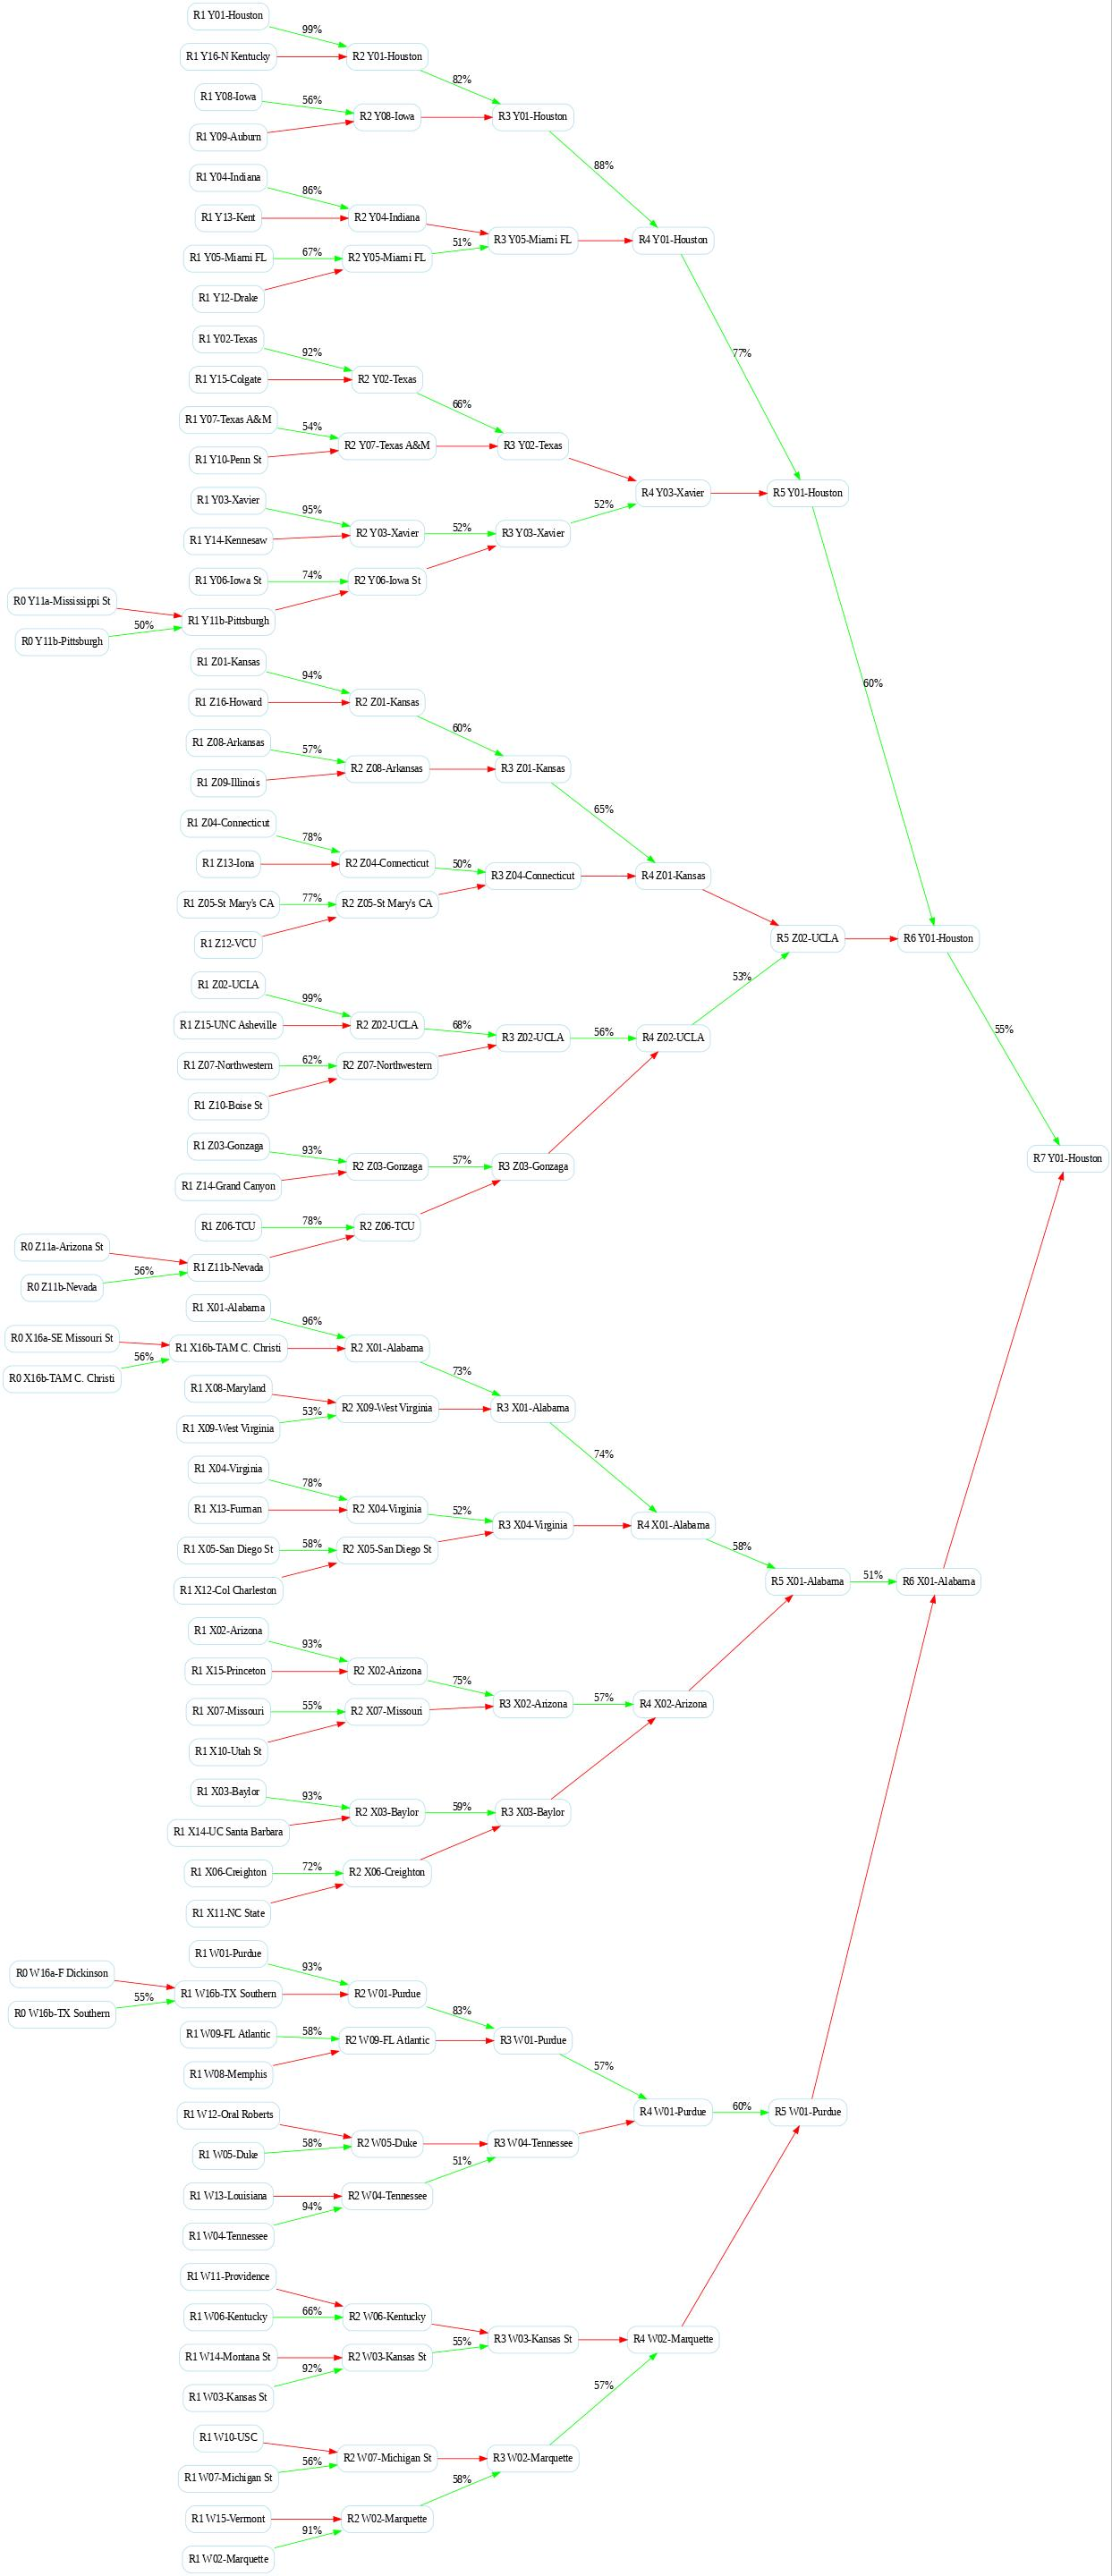

# ✍ Conclusion
This project explored the March Machine Learning Mania 2023 dataset from Kaggle and built a deep learning model to predict the outcomes of the tournament. The dataset was preprocessed and visualized to gain insights, and a deep learning model with four fully connected layers was created and trained using the RMSprop optimizer. The model was then evaluated using k-fold cross-validation and simulated to predict the outcome of the tournament. Our model predicts Houston will win the championship, but this prediction can be adjusted by changing the seed. This project demonstrates the power of deep learning models in predicting the outcomes of complex sporting events like March Madness.

# About
Thank you for reading and paying attention to my notebook. A lot of effort went into this notebook, I hope you share your insight with me via Twitter. </br>
Discord ID: Elprognerd#8324</br>
Twitter: https://twitter.com/Elprognerd